# Vaccine Visions: Cracking the Code of Vaccine Uptake with Data Science

## Introduction
In the face of global pandemics and seasonal flu outbreaks, understanding what drives individuals to get vaccinated is crucial for public health initiatives. Vaccination campaigns rely not only on the availability of vaccines but also on the willingness of the population to participate. However, vaccine hesitancy remains a significant barrier, influenced by a complex web of social, psychological, and demographic factors. This project, "Vaccine Visions: Cracking the Code on H1N1 and Flu Shots with Data Science," aims to dissect these factors and predict vaccine uptake using advanced machine learning techniques. By analyzing data from the National 2009 H1N1 Flu Survey, we explore the underlying patterns and predictors that can guide more effective vaccination strategies in the future.

## Problem Statement
Despite the availability of vaccines for the H1N1 virus and seasonal flu, a significant portion of the population remains unvaccinated. This poses a substantial challenge to public health, as unvaccinated individuals contribute to the spread of these viruses, leading to higher morbidity and mortality rates. The problem is multifaceted, involving factors such as socio-economic status, health beliefs, misinformation, and accessibility. The goal of this project is to develop predictive models that can accurately forecast whether individuals are likely to get vaccinated based on their demographic background, opinions, and behaviors. By identifying the key determinants of vaccine uptake, we can provide actionable insights to public health officials, helping to design targeted interventions that increase vaccination rates and protect communities from preventable diseases.


## Data Understanding
In this project, we aim to predict the likelihood of individuals receiving the H1N1 and seasonal flu vaccines based on a variety of demographic, behavioral, and attitudinal features. Understanding the data is a crucial step that sets the foundation for effective model building and analysis. Here, we will explore the dataset, its features, distributions, and relationships, providing insights that guide the subsequent steps in the project.


The dataset used in this project is derived from the National 2009 H1N1 Flu Survey. It includes responses from individuals regarding their vaccination status for both the H1N1 virus and the seasonal flu. Alongside these target variables, the dataset contains a wide range of features that capture respondents' demographics, health behaviors, and attitudes toward vaccination.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)
Now lets explore the dataset with the aim of understanding the data structure, identify the data types of variables, check for missing values and determine appropriate strategies for handling them.

In [2]:
# Load the datasets
features_df = pd.read_csv('data/training_set_features.csv')
labels_df = pd.read_csv('data/training_set_labels.csv')

# Display the structure and basic information of each dataset
features_info = features_df.info()
labels_info = labels_df.info()

features_info, labels_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

(None, None)

Rows (Observations): 26,707

Columns (Features + Targets): 38 (36 features + 2 target variables)

The dataset contains two key target variables:
1. h1n1_vaccine: Binary variable indicating whether the respondent received the H1N1 vaccine (1 = Yes, 0 = No).
2. seasonal_vaccine: Binary variable indicating whether the respondent received the seasonal flu vaccine (1 = Yes, 0 = No).

These variables are our primary focus, and we aim to predict them using the features provided.


### Feature Exploration
The features in the dataset can be broadly categorized into the following groups:
1. **Demographic Features:**

    `age_group`: Categorical feature indicating the age group of the respondent.

    `sex`: Categorical feature indicating the gender of the respondent.

    `education`: Categorical feature indicating the education level of the respondent.

    `income_poverty`: Categorical feature indicating the respondent's income relative to the poverty line.

    `race`: Categorical feature indicating the race of the respondent.

    `marital_status`: Categorical feature indicating the marital status of the respondent.

    `census_msa`: Categorical feature indicating whether the respondent lives in a metropolitan statistical area (MSA).

    `hhs_geo_region`: Categorical feature representing the respondent's geographic region.

2. **Health related Features:**

    `health_worker`: Binary feature indicating whether the respondent is a health worker.

    `health_insurance`: Binary feature indicating whether the respondent has health insurance.

    `chronic_med_condition`: Binary feature indicating whether the respondent has any chronic medical conditions.

    `child_under_6_months`: Binary feature indicating whether the respondent has close contact with a child under six months old.

    `household_adults`: Numerical feature indicating the number of adults in the respondent's household.

    `household_children`: Numerical feature indicating the number of children in the respondent's household.

    `doctor_recc_h1n1` and `doctor_recc_seasonal`: Binary features indicating whether a doctor recommended the H1N1 and seasonal vaccines, respectively.

3. **Attitudinal Features:**

    `h1n1_concern`: Ordinal feature indicating the level of concern about the H1N1 flu.

    `h1n1_knowledge`: Ordinal feature indicating the level of knowledge about the H1N1 flu.

    `opinion_h1n1_vacc_effective`: Ordinal feature representing the respondent's opinion on the effectiveness of the H1N1 vaccine.

    `opinion_h1n1_risk`: Ordinal feature representing the respondent's opinion on the risk of getting sick with H1N1 without the vaccine.

    `opinion_h1n1_sick_from_vacc`: Ordinal feature representing the respondent's concern about getting sick from the H1N1 vaccine.

    `opinion_seas_vacc_effective`: Ordinal feature representing the respondent's opinion on the effectiveness of the seasonal flu vaccine.

    `opinion_seas_risk`: Ordinal feature representing the respondent's opinion on the risk of getting sick with seasonal flu without the vaccine.

    `opinion_seas_sick_from_vacc`: Ordinal feature representing the respondent's concern about getting sick from the seasonal flu vaccine.

4. **Behavioral Features:**

    `behavioral_antiviral_meds`: Binary feature indicating whether the respondent has taken antiviral medications.

    `behavioral_face_mask`: Binary feature indicating whether the respondent has bought a face mask.

    `behavioral_wash_hands`: Binary feature indicating whether the respondent frequently washes hands or uses hand sanitizer.

    `behavioral_large_gatherings`: Binary feature indicating whether the respondent has reduced time at large gatherings.

    `behavioral_outside_home`: Binary feature indicating whether the respondent has reduced contact with people outside of their household.
    
    `behavioral_touch_face`: Binary feature indicating whether the respondent has avoided touching their face.


The "respondent_id" column likely serves as a unique identifier for each record (row) in the dataset. While this is useful for tracking individual respondents, it doesn’t provide any meaningful information for predictive modeling or analysis. Therefore we can comfortably drop the column.

In [3]:
# Dropping the 'respondent_id' column from both dataframes
features_df = features_df.drop(columns=['respondent_id'])
labels_df = labels_df.drop(columns=['respondent_id'])

# Confirm the drop by displaying the first few rows of both dataframes
features_df.head(), labels_df.head()

(   h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
 0           1.0             0.0                        0.0   
 1           3.0             2.0                        0.0   
 2           1.0             1.0                        0.0   
 3           1.0             1.0                        0.0   
 4           2.0             1.0                        0.0   
 
    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
 0                   0.0                   0.0                    0.0   
 1                   1.0                   0.0                    1.0   
 2                   1.0                   0.0                    0.0   
 3                   1.0                   0.0                    1.0   
 4                   1.0                   0.0                    1.0   
 
    behavioral_large_gatherings  behavioral_outside_home  \
 0                          0.0                      1.0   
 1                          0.0                      1.0   


### Checking for missing data

In [4]:
# Calculate the number of missing values in each column
missing_values = features_df.isnull().sum()

# Calculate the percentage of missing data
missing_percentage = (missing_values / len(features_df)) * 100

# Create a DataFrame to summarize the missing data
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage of Missing Data': missing_percentage
}).sort_values(by='Percentage of Missing Data', ascending=False)

missing_data_summary

,Missing Values,Percentage of Missing Data
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


1. Columns with Significant Missing Data:
    * employment_occupation: 50.44% missing
    * employment_industry: 49.91% missing
    * health_insurance: 45.96% missing
These columns have substantial missing data, which may necessitate either imputation or exclusion depending on their importance in the model.

2. Columns with Moderate Missing Data:
    * income_poverty: 16.56% missing
    * doctor_recc_h1n1 and doctor_recc_seasonal: 8.09% missing each
    * rent_or_own: 7.65% missing
Imputation strategies like using the mode (for categorical variables) or median (for continuous variables) might be appropriate.

3. Columns with Low Missing Data:
    * employment_status: 5.48% missing
    * marital_status: 5.27% missing
    * education: 5.27% missing
    * chronic_med_condition: 3.64% missing
    * child_under_6_months: 3.07% missing
These columns have relatively low missing data and can be handled with simple imputation techniques.

4. Columns with Minimal Missing Data: Other columns have less than 1% missing data, which can generally be imputed without significantly affecting the dataset's integrity.

In [5]:
# Dropping the columns 'employment_industry', 'employment_occupation' and 'health_insurance'
features_df = features_df.drop(columns=['employment_industry', 'employment_occupation', 'health_insurance'])

In [6]:
# Impute missing values
# For moderate missingness columns, use mode for categorical variables
columns_to_impute_mode = [
    'income_poverty', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 
    'rent_or_own', 'employment_status', 'marital_status', 'education',
    'chronic_med_condition', 'child_under_6_months', 'health_worker'
]

for column in columns_to_impute_mode:
    features_df[column].fillna(features_df[column].mode()[0], inplace=True)

# For low missingness columns with opinion data, use mode as well
opinion_columns = [
    'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 
    'opinion_seas_vacc_effective', 'opinion_h1n1_sick_from_vacc',
    'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk'
]

for column in opinion_columns:
    features_df[column].fillna(features_df[column].mode()[0], inplace=True)

# Impute remaining columns with minimal missingness using mode (as all are categorical or binary)
minimal_missing_columns = [
    'household_children', 'household_adults', 'behavioral_avoidance',
    'behavioral_touch_face', 'h1n1_knowledge', 'h1n1_concern',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_antiviral_meds', 'behavioral_wash_hands',
    'behavioral_face_mask'
]

for column in minimal_missing_columns:
    features_df[column].fillna(features_df[column].mode()[0], inplace=True)

# Verify that there are no missing values remaining
missing_data_after_imputation = features_df.isnull().sum()
missing_data_after_imputation[missing_data_after_imputation > 0]


Series([], dtype: int64)

### Univarriate analysis
Here, we want to examine the distribution of individual features. 

But first, let's analyze the distribution of the target variables (`h1n1_vaccine` and `seasonal_vaccine`) to understand the prevalence of vaccination and assess class imbalance.

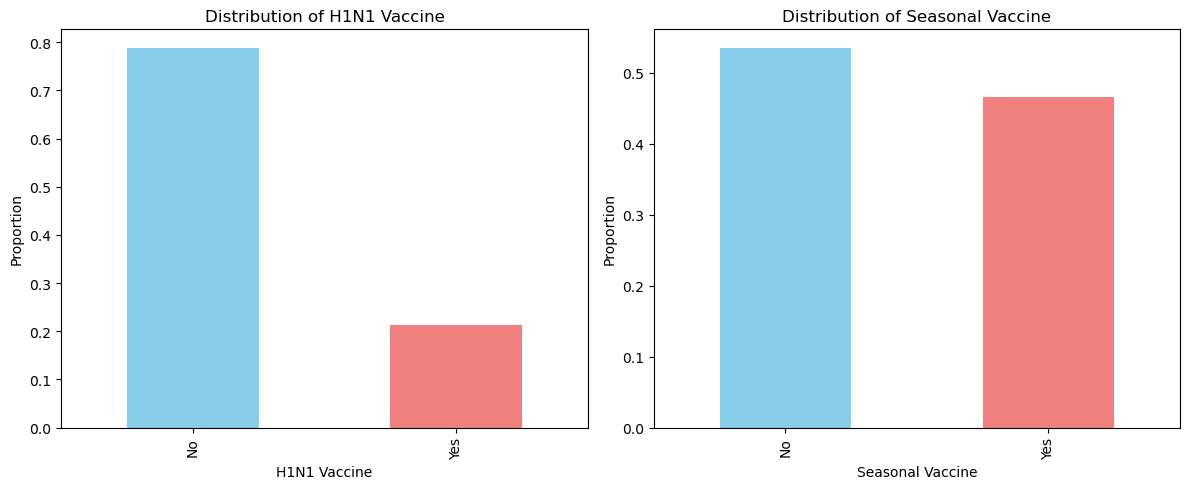

In [7]:
# Plot the distribution of the target variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for h1n1_vaccine
labels_df['h1n1_vaccine'].value_counts(normalize=True).plot(
    kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Distribution of H1N1 Vaccine')
axes[0].set_xlabel('H1N1 Vaccine')
axes[0].set_ylabel('Proportion')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# Plot for seasonal_vaccine
labels_df['seasonal_vaccine'].value_counts(normalize=True).plot(
    kind='bar', ax=axes[1], color=['skyblue', 'lightcoral'])
axes[1].set_title('Distribution of Seasonal Vaccine')
axes[1].set_xlabel('Seasonal Vaccine')
axes[1].set_ylabel('Proportion')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

* For the H1N1 vaccine:

    * A larger proportion of respondents did not receive the H1N1 vaccine compared to those who did, indicating a potential class imbalance.
* For the seasonal vaccine:

    * The distribution is somewhat more balanced, with a higher proportion of respondents who received the seasonal vaccine compared to the H1N1 vaccine.

Next, we can have a look at the distribution of the individual features, starting with categorical features.

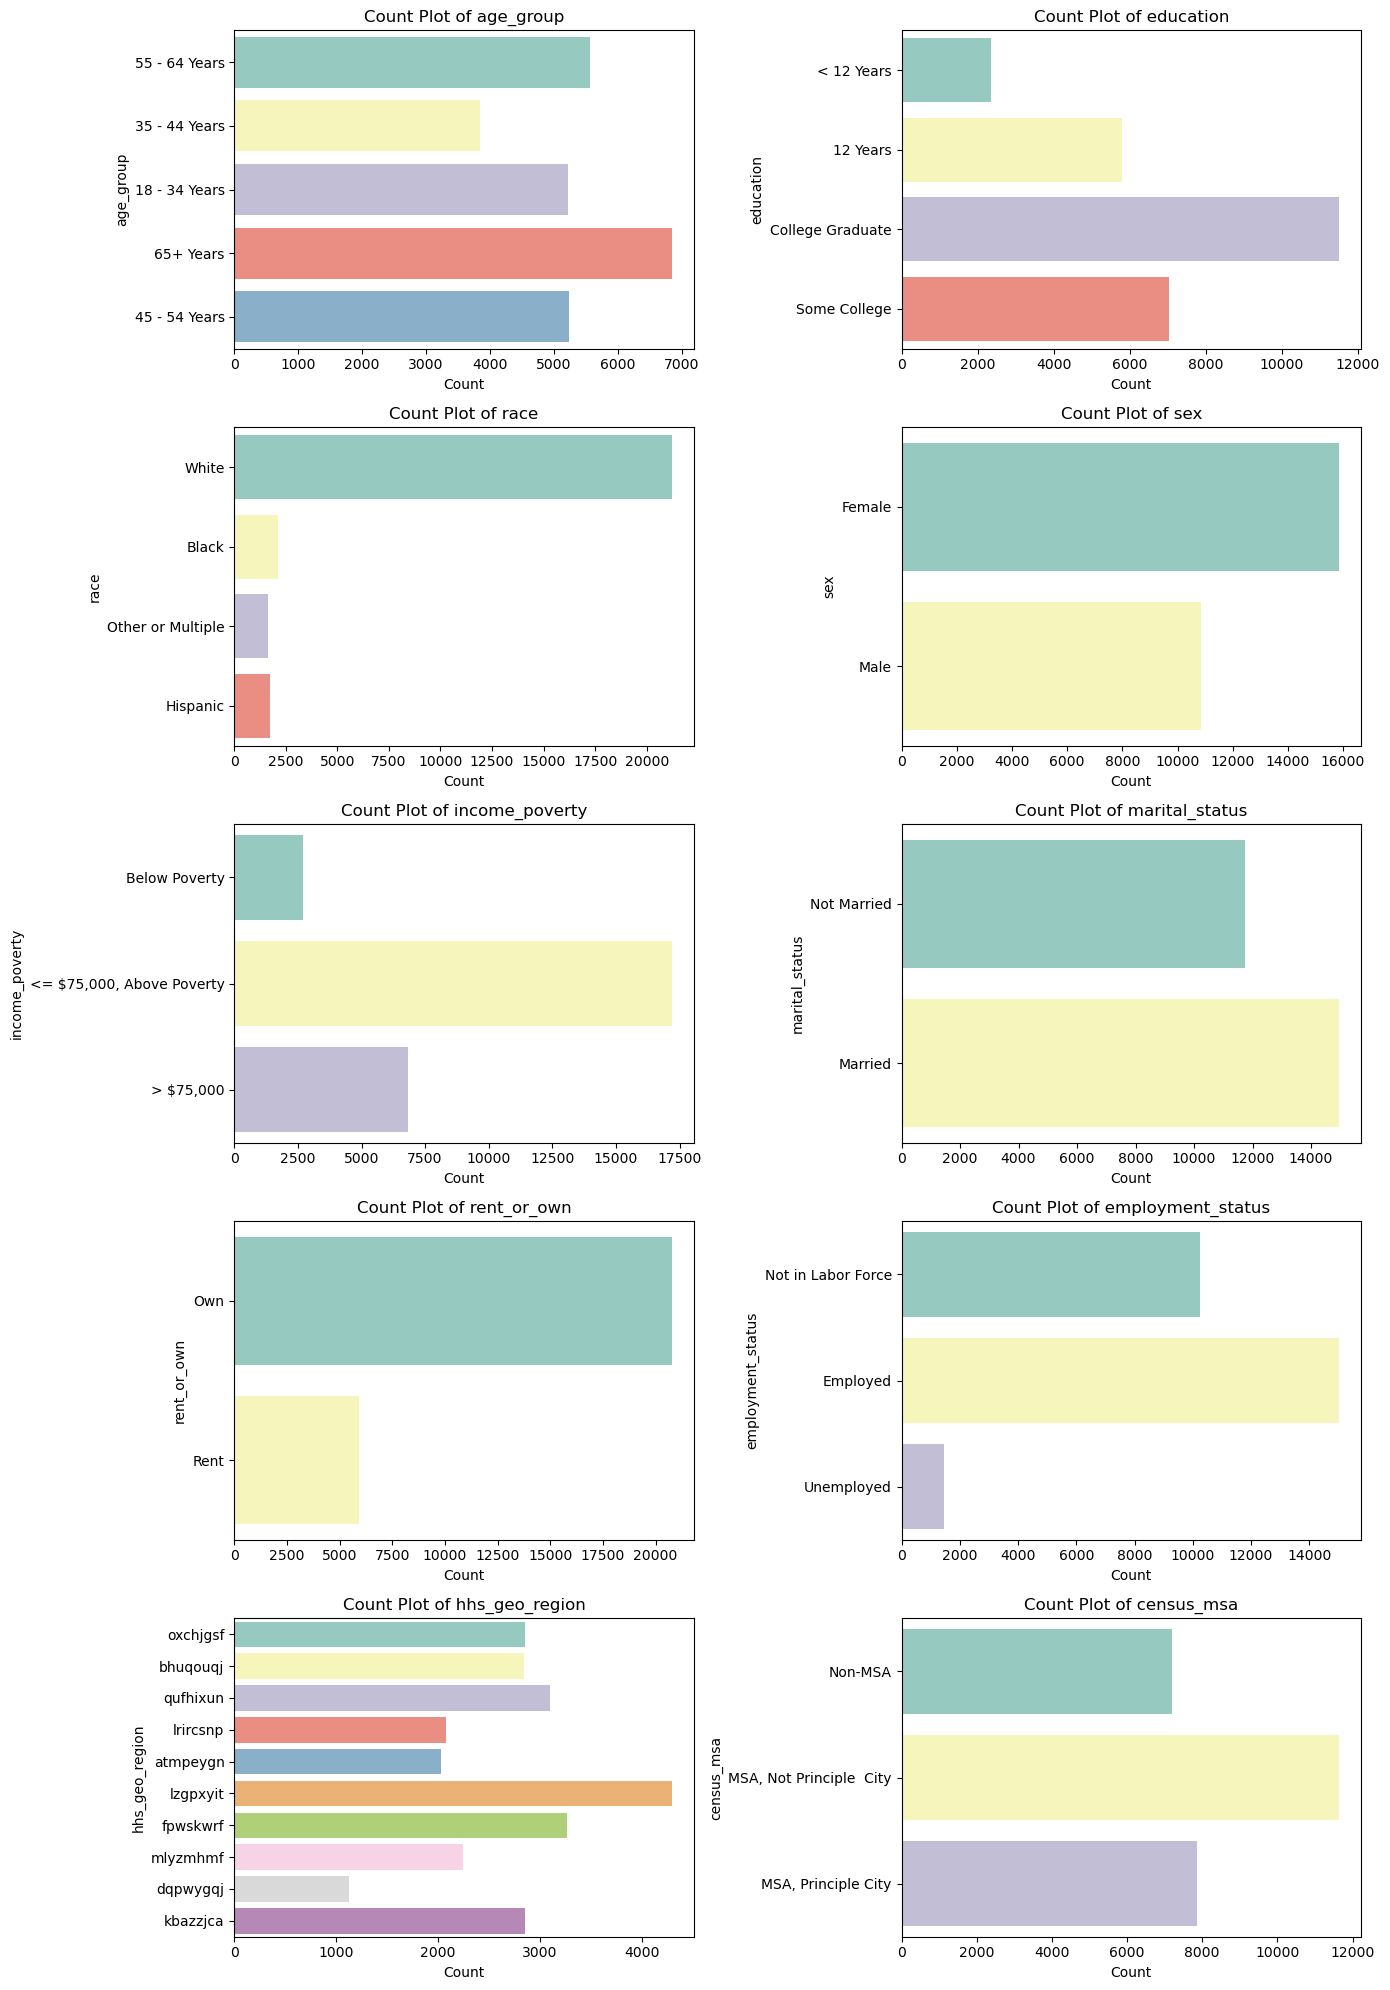

In [8]:
# Identify categorical columns in the features DataFrame
categorical_columns = features_df.select_dtypes(include=['object']).columns

# Set up the figure size and layout
fig, axes = plt.subplots(nrows=len(categorical_columns)//2 + len(categorical_columns)%2, ncols=2, figsize=(14, 4*len(categorical_columns)//2))
axes = axes.flatten()

# Generate count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=features_df, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Now, let's look at the distribution of numerical columns.

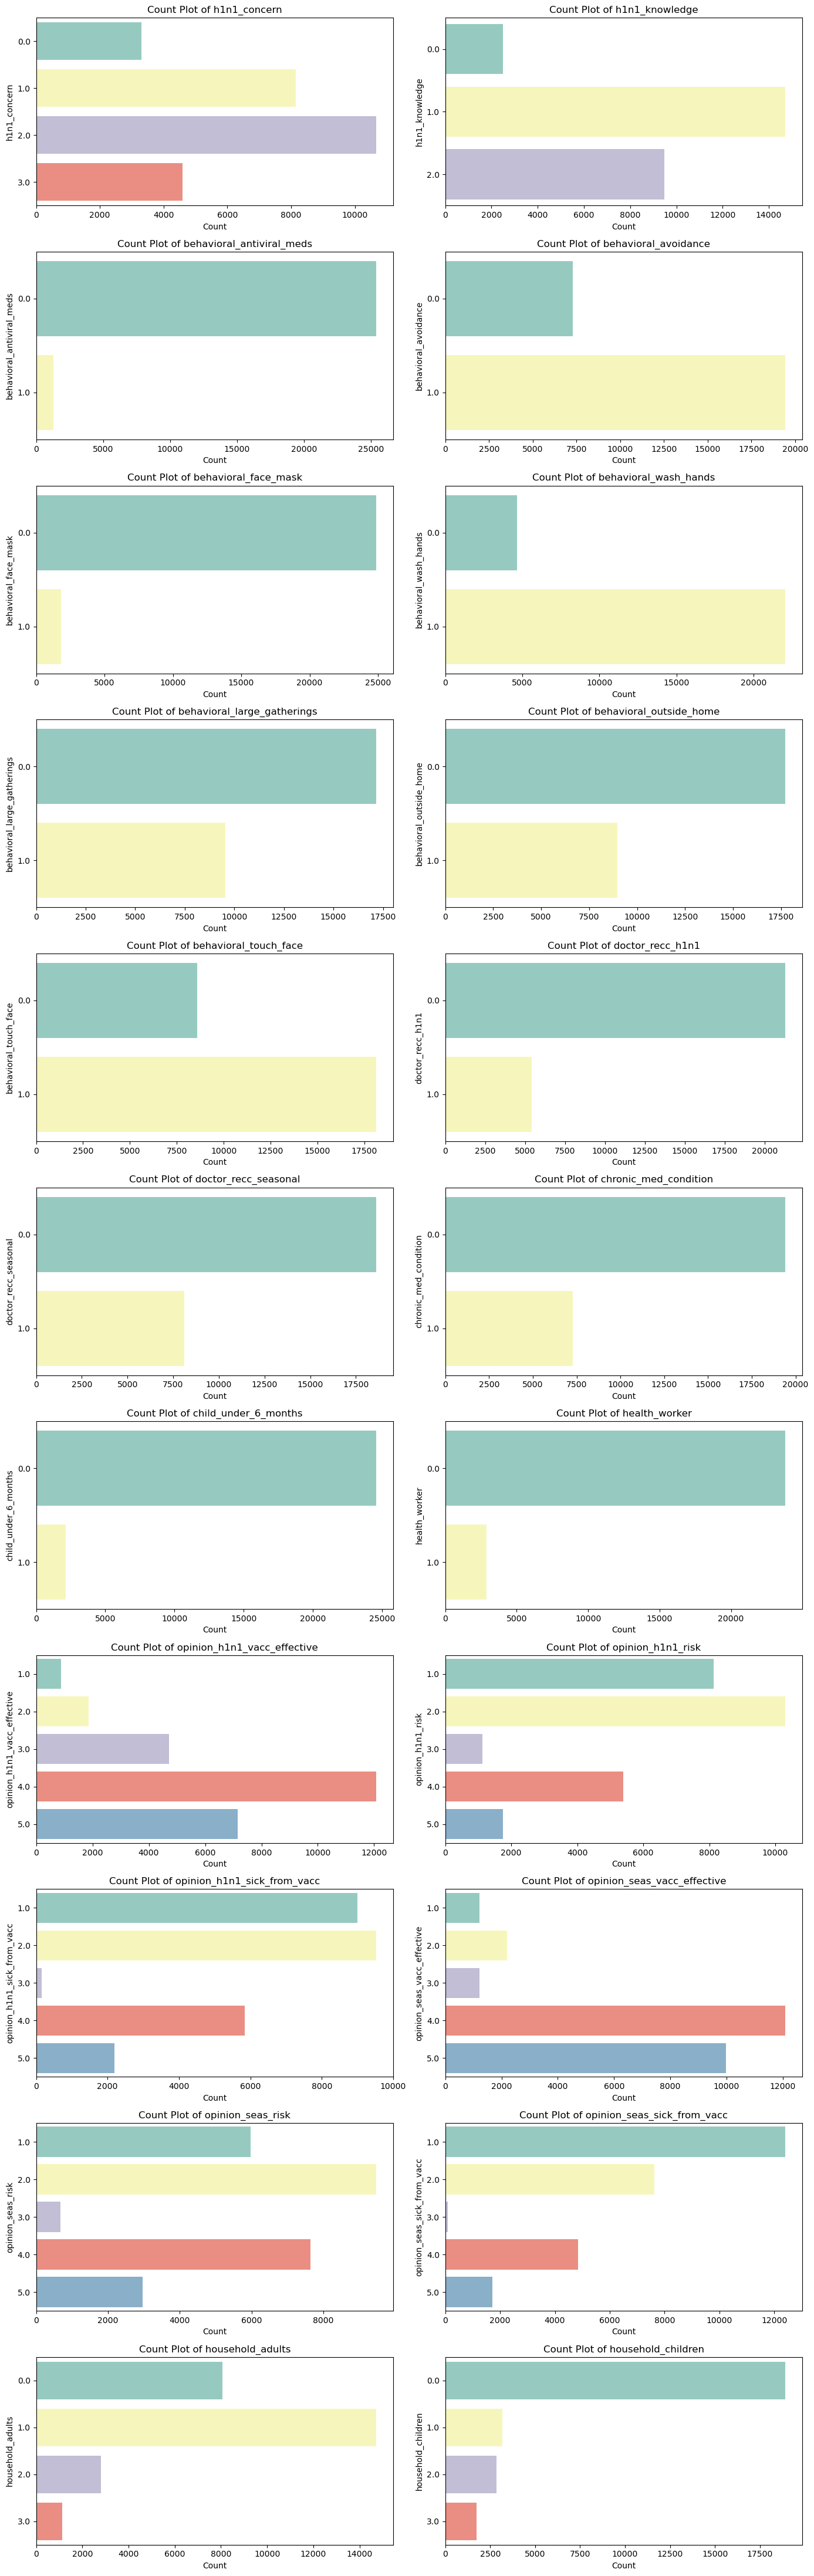

In [9]:
# Identify numerical columns in the features DataFrame
numerical_columns = features_df.select_dtypes(include=['float64', 'int64']).columns

# Generate count plots for each numerical column instead of histograms
fig, axes = plt.subplots(nrows=len(numerical_columns)//2 + len(numerical_columns)%2, ncols=2, figsize=(14, 4*len(numerical_columns)//2))
axes = axes.flatten()

# Generate count plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.countplot(y=col, data=features_df, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### Bivariate analysis
Now let's explore relationships between features and target variables to help undesrtand how different factors influence vaccine uptake.

In [10]:
# Combine the features and labels into one DataFrame
combined_df = pd.concat([features_df, labels_df], axis=1)

# Display the first few rows of the combined DataFrame to verify
combined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [11]:
# General function for plotting vaccination rate
def plot_vaccine_rate_group(features, group_name, data):
    """Plots vaccination rates for a group of features.
    
    Args:
        features (list): List of feature columns to plot.
        group_name (str): Name of the group (e.g., 'Demographic', 'Health-Related').
        data (DataFrame): DataFrame containing the data to plot.
    """
    # Set up the figure size and layout dynamically based on the number of features
    n_features = len(features)
    fig, axes = plt.subplots(nrows=n_features, ncols=2, figsize=(14, 5*n_features))
    
    for i, column_name in enumerate(features):
        # Calculate the rate for H1N1 vaccine
        vaccine_rate_h1n1 = data.groupby(column_name)['h1n1_vaccine'].mean().reset_index()
        vaccine_rate_h1n1['h1n1_vaccine'] = vaccine_rate_h1n1['h1n1_vaccine'] * 100  # Convert to percentage
        
        # Plot H1N1 vaccine uptake
        sns.barplot(x=column_name, y='h1n1_vaccine', data=vaccine_rate_h1n1, ax=axes[i, 0], palette='Set3')
        axes[i, 0].set_title(f'H1N1 Vaccine Uptake Rate by {column_name}')
        axes[i, 0].set_xlabel(column_name)
        axes[i, 0].set_ylabel('Vaccination Rate (%)')
        axes[i, 0].tick_params(axis='x', rotation=45)

        # Calculate the rate for Seasonal Flu vaccine
        vaccine_rate_seasonal = data.groupby(column_name)['seasonal_vaccine'].mean().reset_index()
        vaccine_rate_seasonal['seasonal_vaccine'] = vaccine_rate_seasonal['seasonal_vaccine'] * 100  # Convert to percentage
        
        # Plot Seasonal Flu vaccine uptake
        sns.barplot(x=column_name, y='seasonal_vaccine', data=vaccine_rate_seasonal, ax=axes[i, 1], palette='Set3')
        axes[i, 1].set_title(f'Seasonal Flu Vaccine Uptake Rate by {column_name}')
        axes[i, 1].set_xlabel(column_name)
        axes[i, 1].set_ylabel('Vaccination Rate (%)')
        axes[i, 1].tick_params(axis='x', rotation=45)

    fig.suptitle(f'Vaccine Uptake Rates: {group_name} Features', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust layout to fit the suptitle
    plt.show()


Now lets plot how demographic factors affect vaccination rates

In [12]:
data = pd.concat([features_df, labels_df], axis=1)

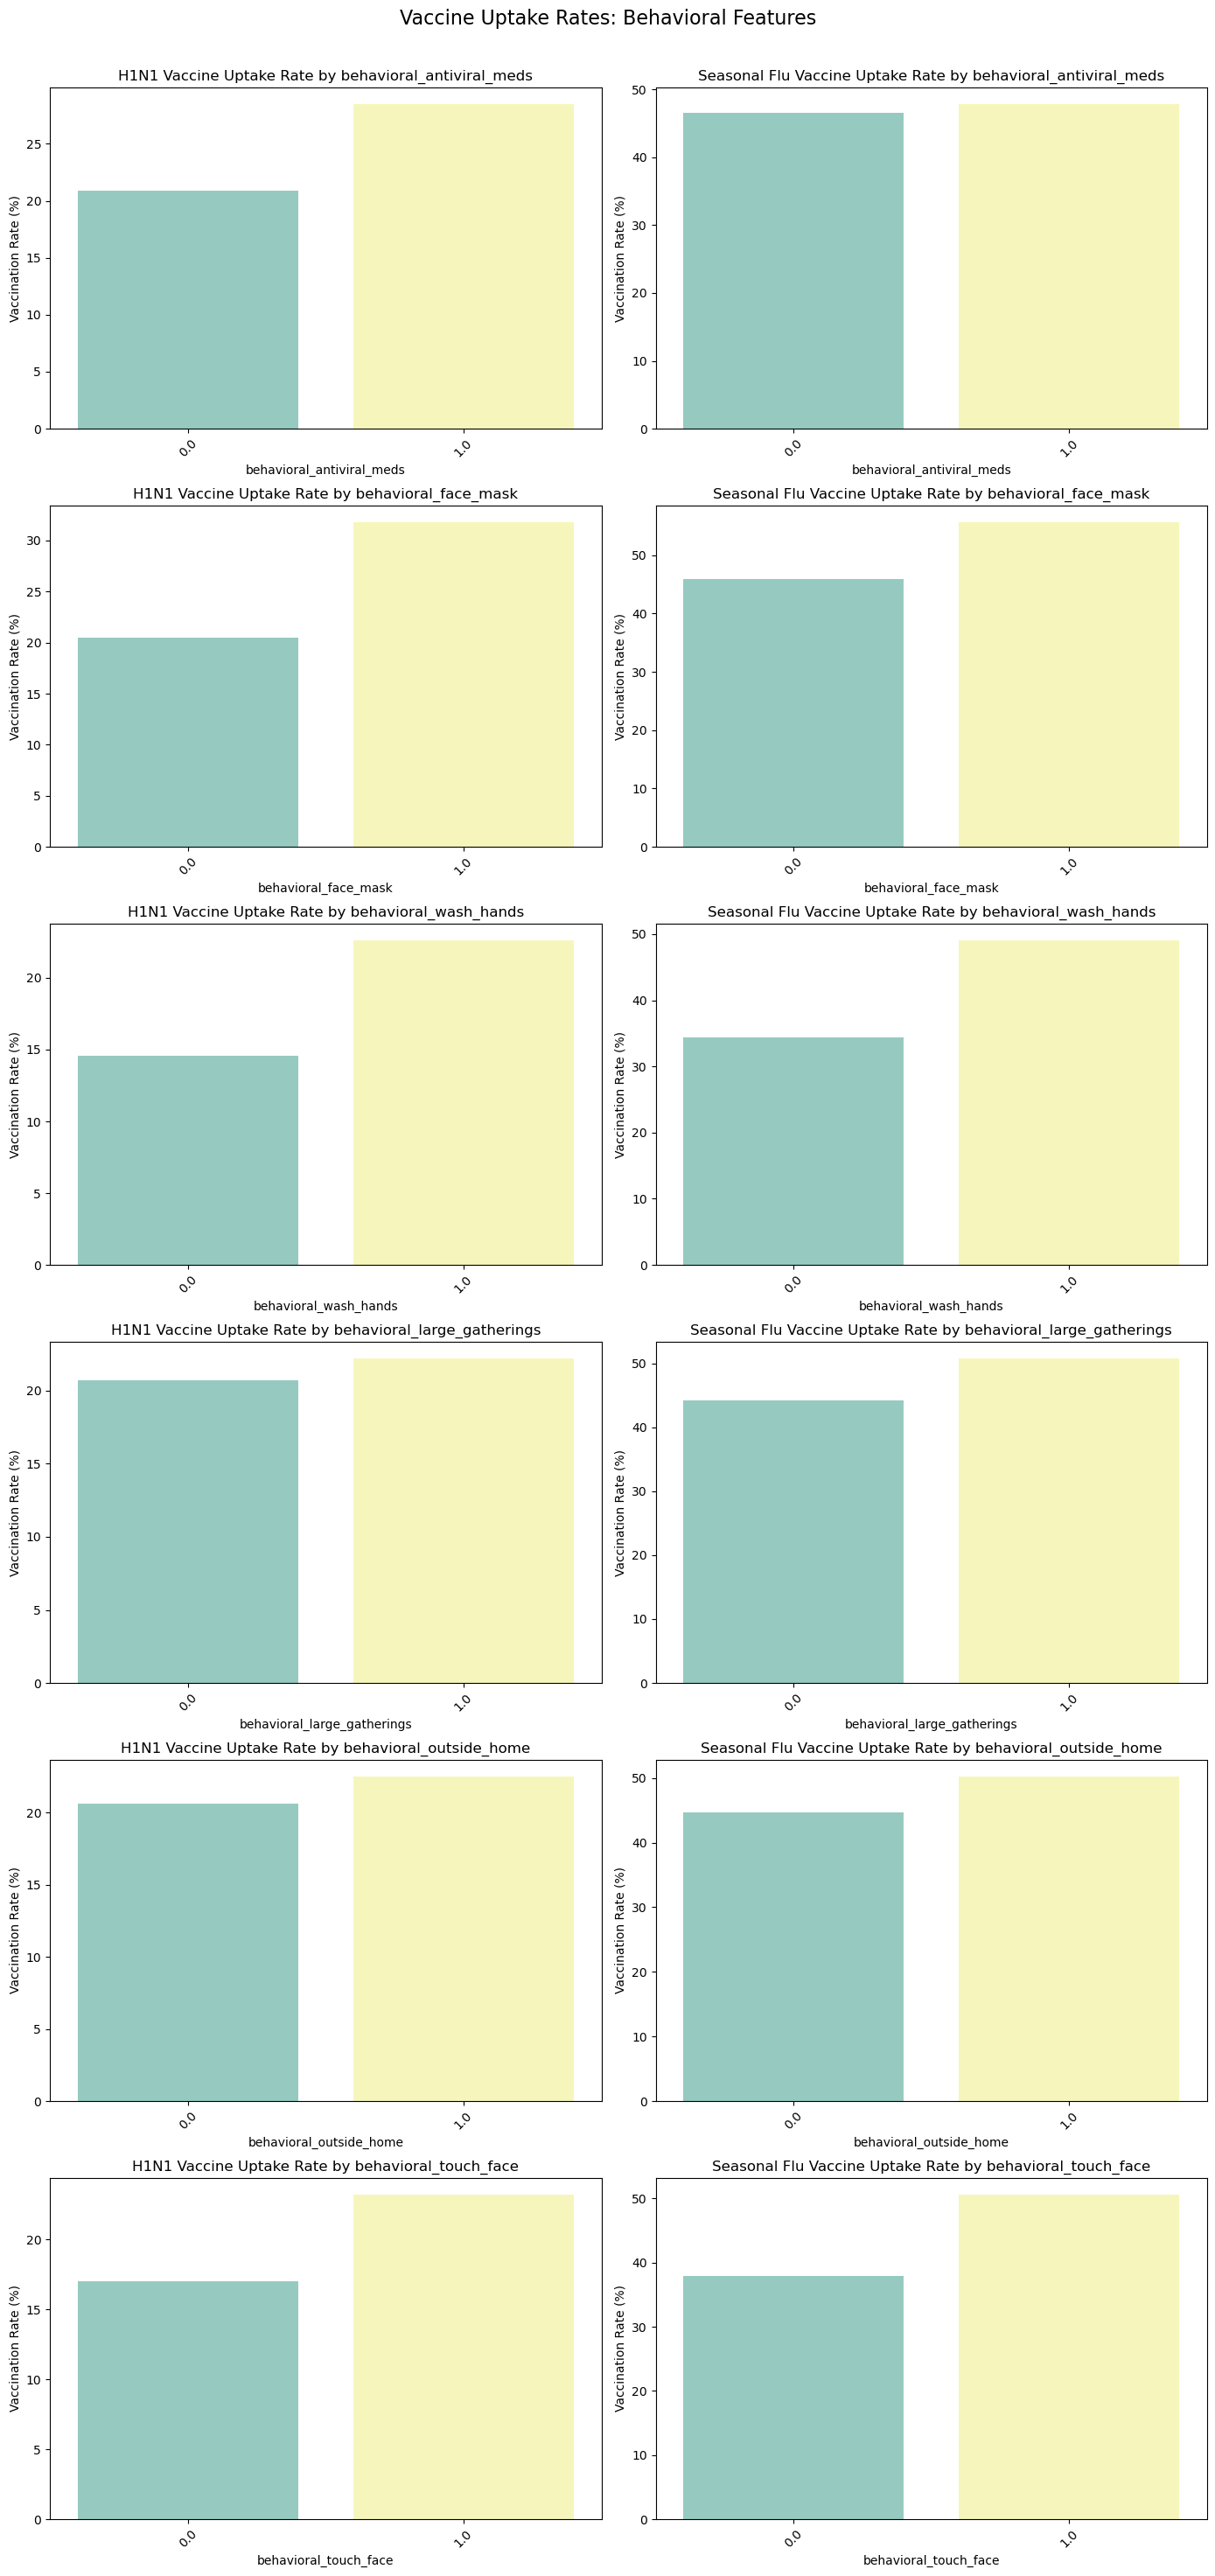

In [13]:
def plot_behavioral_vaccine_rates(data):
    behavioral_columns = [
        'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_wash_hands',
        'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face'
    ]
    plot_vaccine_rate_group(behavioral_columns, 'Behavioral', data)

plot_behavioral_vaccine_rates(data)

Now lets take a look at how the health related features influence vaccination rates

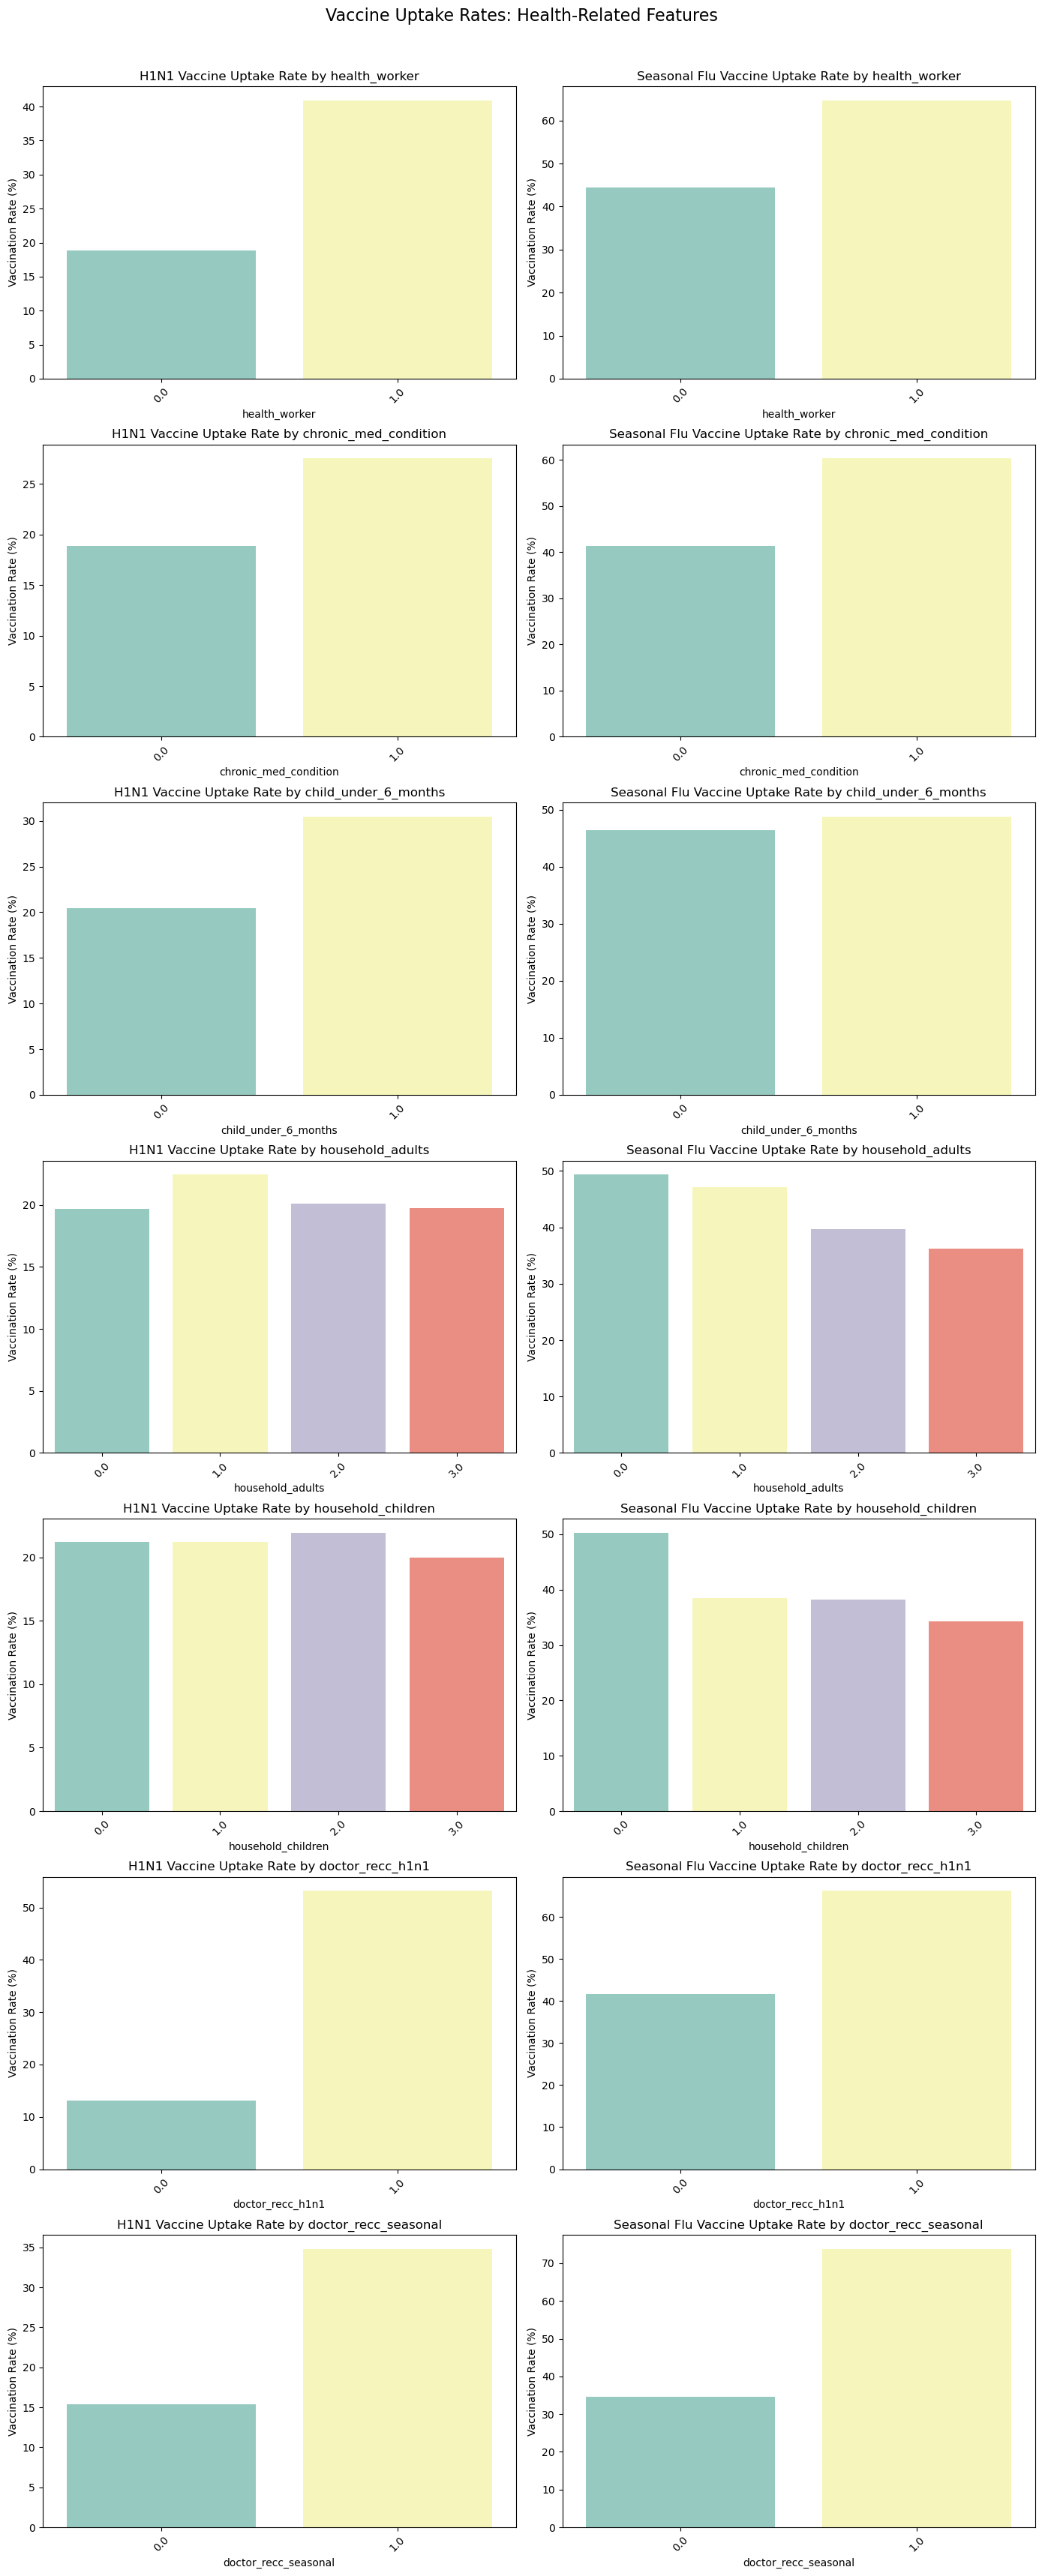

In [14]:
def plot_health_related_vaccine_rates(data):
    health_related_columns = [
        'health_worker', 'chronic_med_condition',
        'child_under_6_months', 'household_adults', 'household_children',
        'doctor_recc_h1n1', 'doctor_recc_seasonal'
    ]
    plot_vaccine_rate_group(health_related_columns, 'Health-Related', data)

plot_health_related_vaccine_rates(data)

Next let's look at how the various attitudinal factors affect vaccination rates

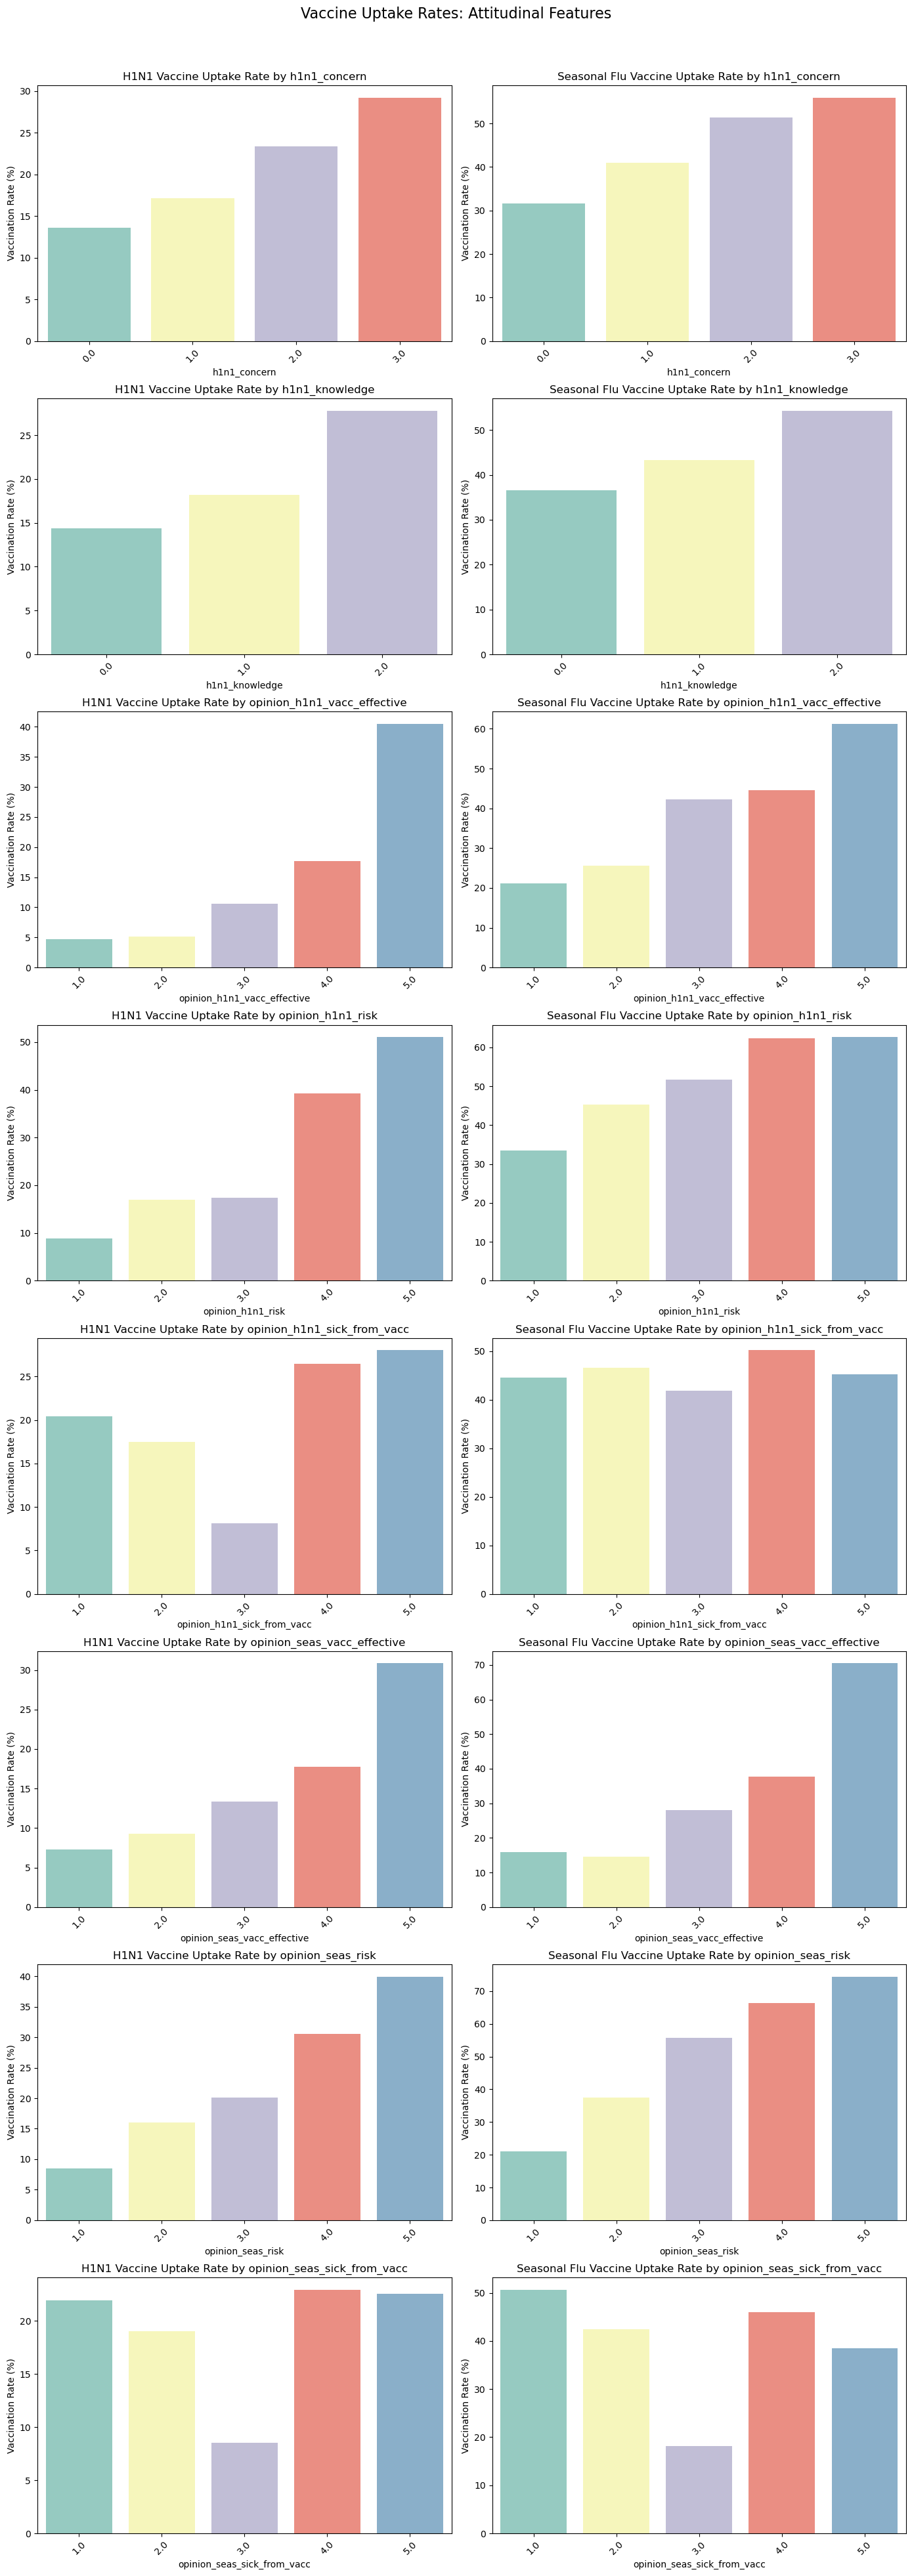

In [15]:
def plot_attitudinal_vaccine_rates(data):
    attitudinal_columns = [
        'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
        'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
        'opinion_seas_risk', 'opinion_seas_sick_from_vacc'
    ]
    plot_vaccine_rate_group(attitudinal_columns, 'Attitudinal', data)

plot_attitudinal_vaccine_rates(data)

Now let's take a look at how various behavioural features influence vaccine uptake

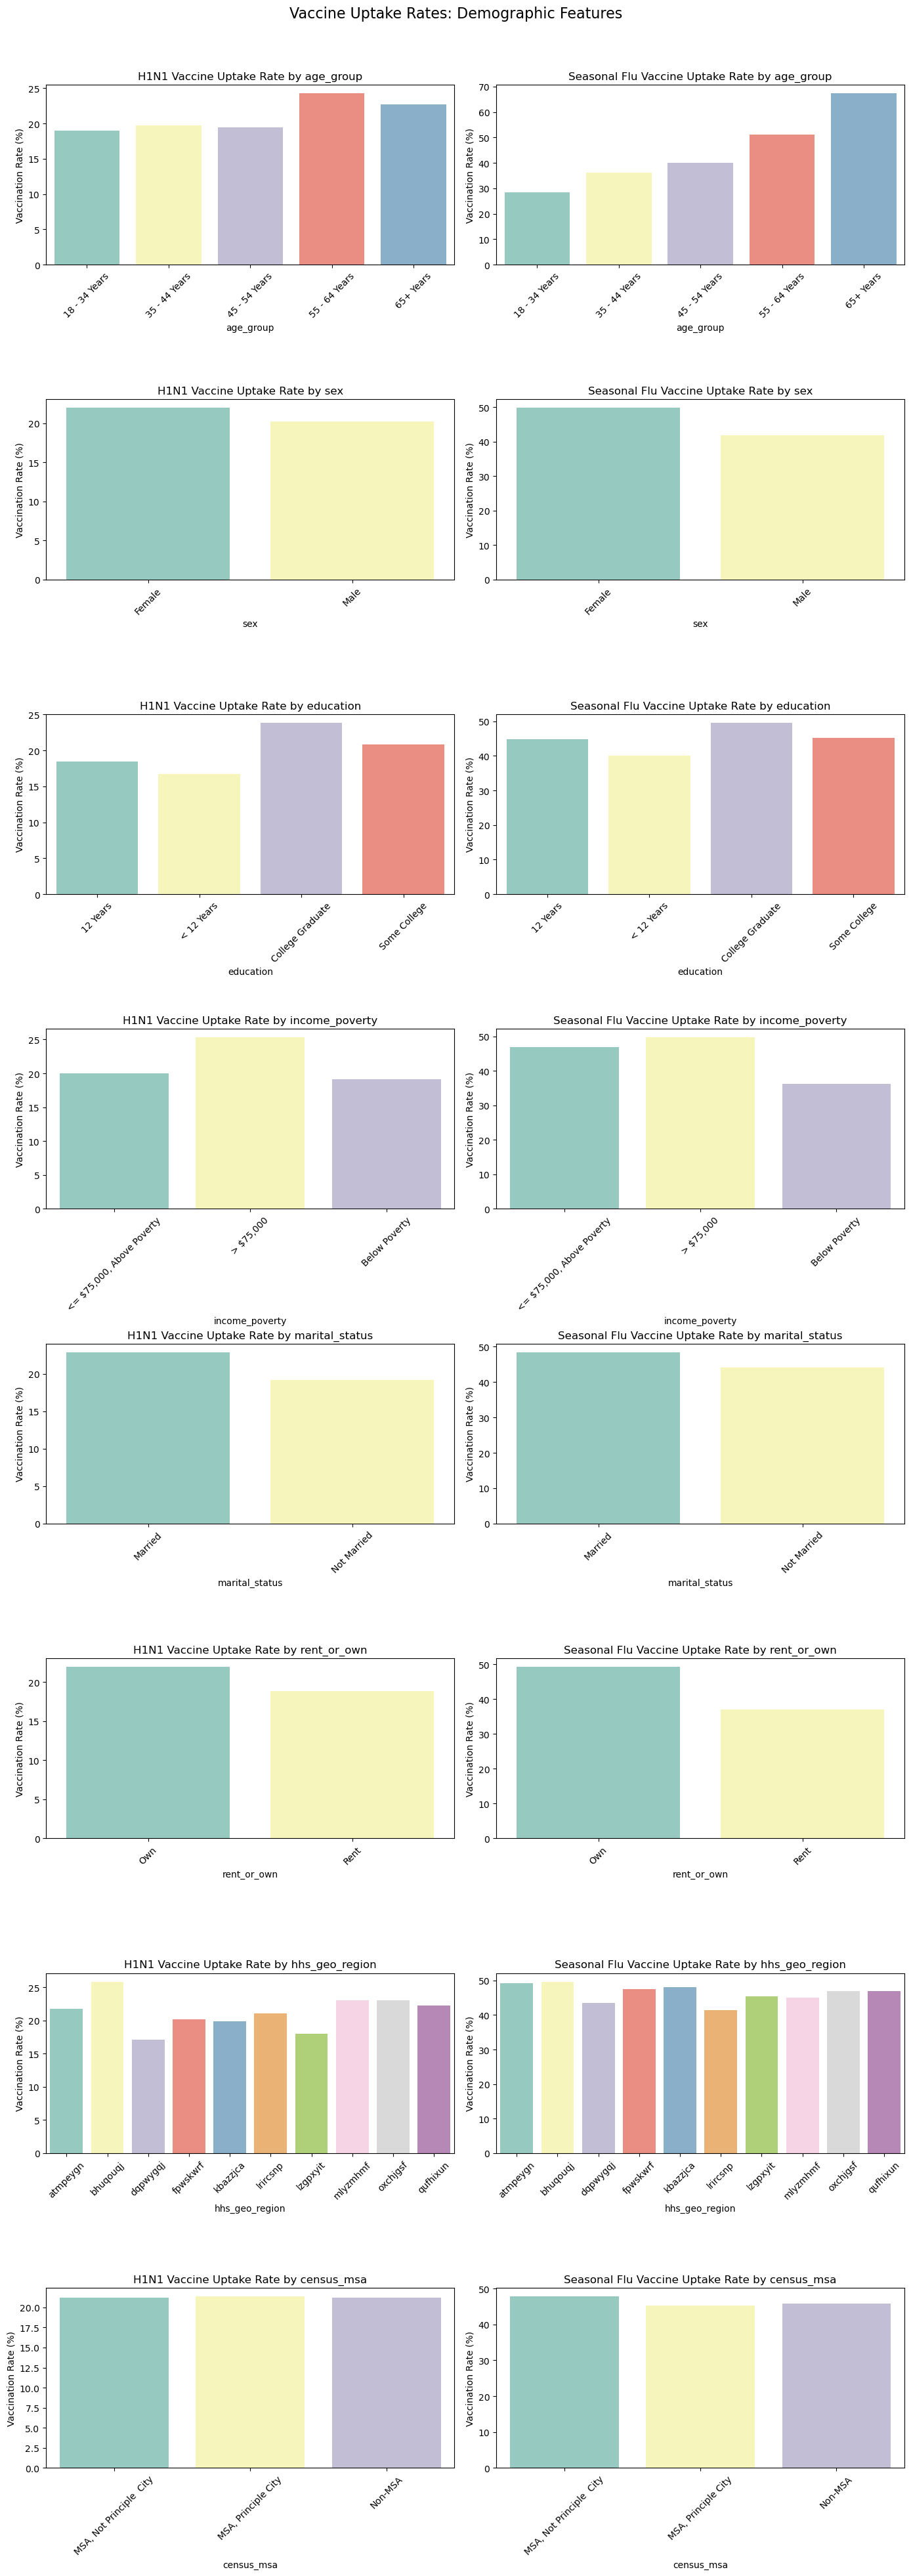

In [16]:
def plot_demographic_vaccine_rates(data):
    demographic_columns = [
        'age_group', 'sex', 'education', 'income_poverty',
        'marital_status', 'rent_or_own',
        'hhs_geo_region', 'census_msa'
    ]
    plot_vaccine_rate_group(demographic_columns, 'Demographic', data)

plot_demographic_vaccine_rates(data)

### Correlation Analysis
Now lets run a correlation analysis to identify which features are most strongly associated with the target variables.

But first we have to deal with categorical columns in our dataset.

In [17]:
# Identify categorical columns in the combined DataFrame
categorical_columns = combined_df.select_dtypes(include=['object']).columns

# Display the list of categorical columns
categorical_columns.tolist()


['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

Let's map age group bins into integers.

In [18]:
# Define a mapping from age group to integer values
age_group_mapping = {
    '18 - 34 Years': 1,
    '35 - 44 Years': 2,
    '45 - 54 Years': 3,
    '55 - 64 Years': 4,
    '65+ Years': 5
}

# Apply the mapping to the 'age_group' column
combined_df['age_group'] = combined_df['age_group'].map(age_group_mapping)

Now, on to education level, mapped on to integers based on the level of education attained.

In [19]:
# Define a mapping from education level to integer values
education_mapping = {
    '< 12 Years': 1,
    '12 Years': 2,
    'Some College': 3,
    'College Graduate': 4
}

# Apply the mapping to the 'education' column
combined_df['education'] = combined_df['education'].map(education_mapping)

Now we convert sex column to integers.

In [20]:
# Define a mapping for the 'sex' column
sex_mapping = {
    'Female': 1,
    'Male': 2
}

# Apply the mapping to the 'sex' column
combined_df['sex'] = combined_df['sex'].map(sex_mapping)

Next we map income_poverty levels

In [21]:
# Define a mapping for the 'income_poverty' column
income_poverty_mapping = {
    'Below Poverty': 1,
    '<= $75,000, Above Poverty': 2,
    '> $75,000': 3
}

# Apply the mapping to the 'income_poverty' column
combined_df['income_poverty'] = combined_df['income_poverty'].map(income_poverty_mapping)

Now, for the rest of the categorical variables:

In [22]:
# Apply binary integer encoding to 'rent_or_own'
rent_or_own_mapping = {
    'Rent': 0,
    'Own': 1
}
combined_df['rent_or_own'] = combined_df['rent_or_own'].map(rent_or_own_mapping)

# Apply one-hot encoding to other nominal categorical columns
combined_df = pd.get_dummies(combined_df, columns=[
    'race', 
    'marital_status', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa'
], drop_first=True)

In [23]:
combined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,True
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [24]:
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Extract the correlation with the target variables
correlation_with_targets = correlation_matrix[['h1n1_vaccine', 'seasonal_vaccine']].sort_values(by='h1n1_vaccine', ascending=False)

# Display the correlation with the target variables
correlation_with_targets

,h1n1_vaccine,seasonal_vaccine
h1n1_vaccine,1.000000,0.377143
doctor_recc_h1n1,0.394086,0.198560
seasonal_vaccine,0.377143,1.000000
opinion_h1n1_risk,0.320580,0.215650
opinion_h1n1_vacc_effective,0.267352,0.203187
opinion_seas_risk,0.255874,0.386916
doctor_recc_seasonal,0.218976,0.360696
opinion_seas_vacc_effective,0.177799,0.358869
health_worker,0.168056,0.126977
h1n1_concern,0.121574,0.154488


* Strongest Correlations with H1N1 Vaccine Uptake:
        
        Doctor Recommendation for H1N1 Vaccine (doctor_recc_h1n1): 0.39

        Seasonal Vaccine Uptake (seasonal_vaccine): 0.38

        Opinion on H1N1 Risk (opinion_h1n1_risk): 0.32

        Opinion on H1N1 Vaccine Effectiveness (opinion_h1n1_vacc_effective): 0.27

        Opinion on Seasonal Flu Risk (opinion_seas_risk): 0.26

* Strongest Correlations with Seasonal Vaccine Uptake:

        Opinion on Seasonal Flu Risk (opinion_seas_risk): 0.39

        Doctor Recommendation for Seasonal Vaccine (doctor_recc_seasonal): 0.37

        Opinion on Seasonal Vaccine Effectiveness (opinion_seas_vacc_effective): 0.36

        Age Group (age_group): 0.28
        
        Doctor Recommendation for H1N1 Vaccine (doctor_recc_h1n1): 0.20

Okay, now we can begin modelling.

## Modeling

First we will start with a baseline logistic regression model that will serve as a reference point.

### Baseline Logistic Regression Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Separate features and target variables
X = combined_df.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = combined_df['h1n1_vaccine']
y_seasonal = combined_df['seasonal_vaccine']

# Split the data into 70% training and 30% testing
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.3, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.3, random_state=42)

# Create a Logistic Regression model for 'h1n1_vaccine'
model_h1n1 = LogisticRegression(max_iter=1000, random_state=42)
model_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Create a Logistic Regression model for 'seasonal_vaccine'
model_seasonal = LogisticRegression(max_iter=1000, random_state=42)
model_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the test set for both models
y_pred_h1n1 = model_h1n1.predict(X_test_h1n1)
y_pred_seasonal = model_seasonal.predict(X_test_seasonal)

# Evaluate the H1N1 vaccine model
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
precision_h1n1 = precision_score(y_test_h1n1, y_pred_h1n1)
recall_h1n1 = recall_score(y_test_h1n1, y_pred_h1n1)
auc_h1n1 = roc_auc_score(y_test_h1n1, model_h1n1.predict_proba(X_test_h1n1)[:, 1])
f1_h1n1 = f1_score(y_test_h1n1, y_pred_h1n1)

# Evaluate the Seasonal vaccine model
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
precision_seasonal = precision_score(y_test_seasonal, y_pred_seasonal)
recall_seasonal = recall_score(y_test_seasonal, y_pred_seasonal)
auc_seasonal = roc_auc_score(y_test_seasonal, model_seasonal.predict_proba(X_test_seasonal)[:, 1])
f1_seasonal = f1_score(y_test_seasonal, y_pred_seasonal)

# Compile the evaluation metrics
evaluation_metrics = {
    'Model': ['H1N1 Vaccine', 'Seasonal Vaccine'],
    'Accuracy': [accuracy_h1n1, accuracy_seasonal],
    'Precision': [precision_h1n1, precision_seasonal],
    'Recall': [recall_h1n1, recall_seasonal],
    'AUC ROC': [auc_h1n1, auc_seasonal],
    'F1 Score': [f1_h1n1, f1_seasonal]
}

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df


,Model,Accuracy,Precision,Recall,AUC ROC,F1 Score
0,H1N1 Vaccine,0.836765,0.691089,0.412043,0.821330,0.516272
1,Seasonal Vaccine,0.784974,0.776705,0.744756,0.851203,0.760395


1. H1N1 Vaccine Model Performance
    * Accuracy: 83.66%

        * This indicates that the model correctly predicted the vaccination status for about 84% of the test cases. However, accuracy alone can be misleading, especially in cases of imbalanced datasets.
    
    * Precision: 69.00%

        * Precision reflects the proportion of true positives among all positive predictions. A precision of 69% suggests that when the model predicts an individual will get the H1N1 vaccine, it is correct 69% of the time. While this is decent, it could mean a fair amount of false positives.
    * Recall: 41.26%

        * Recall, or sensitivity, measures the proportion of actual positives that were correctly identified. A recall of 41% is relatively low, indicating that the model is missing a significant number of individuals who did receive the H1N1 vaccine. In a public health context, this is concerning because failing to identify these individuals could lead to underestimation of vaccine uptake.
    * AUC ROC: 82.13%

        * The AUC ROC score is quite strong, indicating that the model has a good ability to discriminate between vaccinated and non-vaccinated individuals across different threshold settings.
    * F1 Score: 51.64%

        * The F1 Score balances precision and recall, and a score of 51.64% indicates that the model is fairly balanced but could be improved, particularly in increasing recall.
2. Seasonal Vaccine Model Performance
    * Accuracy: 78.45%

        * The accuracy for the Seasonal Vaccine model is slightly lower than the H1N1 model, indicating that it correctly predicted about 78% of the cases.
    * Precision: 77.66%

        * The precision is relatively high, meaning that when the model predicts someone will get the seasonal flu vaccine, it is correct about 78% of the time. This suggests fewer false positives compared to the H1N1 model.
    * Recall: 74.34%

        * The recall is much stronger for the Seasonal Vaccine model, at 74%. This indicates the model is much better at identifying individuals who actually received the seasonal flu vaccine, which is crucial for ensuring public health efforts target the right population.
    * AUC ROC: 85.12%

        * The AUC ROC score for the Seasonal Vaccine model is also strong, even higher than that of the H1N1 model, suggesting good discriminative power.
    * F1 Score: 75.96%

        The F1 Score here reflects a good balance between precision and recall, indicating that the model performs consistently well across both metrics.

#### Potential issues
1. Significant imbalance between precision and recall in the H1N1 Vaccine model. It fails to capture true positives.
2. No handling of feature interactions and multicollinearity in our predictors, since we are using all columns.
3. Potential overfitting to the training data, also because we have too many features.


### Logistic regression model with SMOTE:
Using Synthetic Minority Oversampling Technique is a good strategy to address class imbalance, particularly when trying to improve recall and overall model performance.

In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the pipeline for the H1N1 vaccine model
pipeline_h1n1 = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the pipeline for the Seasonal vaccine model
pipeline_seasonal = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the pipelines on the training data
pipeline_h1n1.fit(X_train_h1n1, y_train_h1n1)
pipeline_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the original test set for both models
y_pred_h1n1_smote = pipeline_h1n1.predict(X_test_h1n1)
y_pred_seasonal_smote = pipeline_seasonal.predict(X_test_seasonal)

# Evaluate the H1N1 vaccine model
accuracy_h1n1_smote = accuracy_score(y_test_h1n1, y_pred_h1n1_smote)
precision_h1n1_smote = precision_score(y_test_h1n1, y_pred_h1n1_smote)
recall_h1n1_smote = recall_score(y_test_h1n1, y_pred_h1n1_smote)
auc_h1n1_smote = roc_auc_score(y_test_h1n1, pipeline_h1n1.predict_proba(X_test_h1n1)[:, 1])
f1_h1n1_smote = f1_score(y_test_h1n1, y_pred_h1n1_smote)


# Evaluate the Seasonal vaccine model
accuracy_seasonal_smote = accuracy_score(y_test_seasonal, y_pred_seasonal_smote)
precision_seasonal_smote = precision_score(y_test_seasonal, y_pred_seasonal_smote)
recall_seasonal_smote = recall_score(y_test_seasonal, y_pred_seasonal_smote)
auc_seasonal_smote = roc_auc_score(y_test_seasonal, pipeline_seasonal.predict_proba(X_test_seasonal)[:, 1])
f1_seasonal_smote = f1_score(y_test_seasonal, y_pred_seasonal_smote)


# Compile the evaluation metrics for SMOTE-applied models
evaluation_metrics_smote = {
    'Model': ['H1N1 Vaccine (SMOTE)', 'Seasonal Vaccine (SMOTE)'],
    'Accuracy': [accuracy_h1n1_smote, accuracy_seasonal_smote],
    'Precision': [precision_h1n1_smote, precision_seasonal_smote],
    'Recall': [recall_h1n1_smote, recall_seasonal_smote],
    'AUC ROC': [auc_h1n1_smote, auc_seasonal_smote],
    'F1 Score': [f1_h1n1_smote, f1_seasonal_smote],

}

evaluation_df_smote = pd.DataFrame(evaluation_metrics_smote)
evaluation_df_smote

,Model,Accuracy,Precision,Recall,AUC ROC,F1 Score
0,H1N1 Vaccine (SMOTE),0.800574,0.525424,0.585596,0.791214,0.553881
1,Seasonal Vaccine (SMOTE),0.780607,0.761553,0.758649,0.849267,0.760098


### Logistic Regression model with class weights:

In [30]:
# Train the logistic regression model with class weights for H1N1 vaccine
model_h1n1_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model_h1n1_weighted.fit(X_train_h1n1, y_train_h1n1)

# Train the logistic regression model with class weights for Seasonal vaccine
model_seasonal_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model_seasonal_weighted.fit(X_train_seasonal, y_train_seasonal)

# Predict on the original test set for both models
y_pred_h1n1_weighted = model_h1n1_weighted.predict(X_test_h1n1)
y_pred_seasonal_weighted = model_seasonal_weighted.predict(X_test_seasonal)

# Evaluate the H1N1 vaccine model
accuracy_h1n1_weighted = accuracy_score(y_test_h1n1, y_pred_h1n1_weighted)
precision_h1n1_weighted = precision_score(y_test_h1n1, y_pred_h1n1_weighted)
recall_h1n1_weighted = recall_score(y_test_h1n1, y_pred_h1n1_weighted)
f1_h1n1_weighted = f1_score(y_test_h1n1, y_pred_h1n1_weighted)
auc_h1n1_weighted = roc_auc_score(y_test_h1n1, model_h1n1_weighted.predict_proba(X_test_h1n1)[:, 1])

# Evaluate the Seasonal vaccine model
accuracy_seasonal_weighted = accuracy_score(y_test_seasonal, y_pred_seasonal_weighted)
precision_seasonal_weighted = precision_score(y_test_seasonal, y_pred_seasonal_weighted)
recall_seasonal_weighted = recall_score(y_test_seasonal, y_pred_seasonal_weighted)
f1_seasonal_weighted = f1_score(y_test_seasonal, y_pred_seasonal_weighted)
auc_seasonal_weighted = roc_auc_score(y_test_seasonal, model_seasonal_weighted.predict_proba(X_test_seasonal)[:, 1])

# Compile the evaluation metrics for weighted models
evaluation_metrics_weighted = {
    'Model': ['H1N1 Vaccine (Weighted)', 'Seasonal Vaccine (Weighted)'],
    'Accuracy': [accuracy_h1n1_weighted, accuracy_seasonal_weighted],
    'Precision': [precision_h1n1_weighted, precision_seasonal_weighted],
    'Recall': [recall_h1n1_weighted, recall_seasonal_weighted],
    'F1 Score': [f1_h1n1_weighted, f1_seasonal_weighted],
    'AUC ROC': [auc_h1n1_weighted, auc_seasonal_weighted]
}

evaluation_df_weighted = pd.DataFrame(evaluation_metrics_weighted)
evaluation_df_weighted


,Model,Accuracy,Precision,Recall,F1 Score,AUC ROC
0,H1N1 Vaccine (Weighted),0.775739,0.479474,0.710153,0.572448,0.822371
1,Seasonal Vaccine (Weighted),0.782728,0.760389,0.767638,0.763996,0.851233


1. H1N1 Vaccine Model:
    * Improved Recall: The weighted model significantly improved recall to 71.02%, which is a critical improvement for public health, ensuring that more individuals who are likely to get vaccinated are correctly identified.
    * Trade-off in Precision: The precision dropped, which means the model is predicting more false positives, but this trade-off is often acceptable in public health when recall is prioritized.
    * Better Balance: The F1 Score improved, indicating a better overall balance between precision and recall compared to the initial model. The AUC ROC remained strong, ensuring good overall model performance.
2. Seasonal Vaccine Model:
    * Consistent Performance: The seasonal vaccine model showed consistent and strong performance across all metrics, with only slight changes from the initial and SMOTE models. The class weighting helped maintain a good balance between precision and recall, with strong accuracy and AUC ROC scores.

Conclusion

1. H1N1 Vaccine Model: The weighted model is particularly effective if the goal is to maximize recall, even at the cost of some precision. This makes it a strong candidate for public health applications where capturing as many true positives as possible is critical.
2. Seasonal Vaccine Model: The class-weighted model performs very similarly to the initial and SMOTE models, indicating robustness across different methods of handling class imbalance. This model remains highly effective for predicting seasonal flu vaccine uptake.

Overall, using class weights has proven to be effective, especially for the H1N1 vaccine model, where recall is a key concern. 

### Performance Metric Selection

With this, we go back to the objectives to choose whether to prioritize recall or precision.

**The Case for Prioritizing Recall:**

Public Health Goals: In the context of public health, missing out on individuals who are likely to get vaccinated (false negatives) could mean failing to fully understand the factors driving vaccine uptake. This could lead to less effective strategies for increasing overall vaccination rates.

Comprehensive Coverage: Ensuring that we capture as many true positives as possible allows public health officials to cast a wider net in understanding and encouraging vaccination behaviors. This is crucial in times of public health crises, where maximizing vaccine uptake can be a matter of life and death.

**The Case for Prioritizing Precision:**

Resource Efficiency: If public health resources (like vaccine doses, outreach personnel, or communication campaigns) are limited, it might be more important to focus on those who are most likely to respond positively to vaccination campaigns. This approach ensures that resources are not wasted on individuals who are unlikely to get vaccinated.

Targeted Interventions: High precision could improve the effectiveness of targeted interventions, ensuring that efforts are concentrated on individuals who are both likely to get vaccinated and can be influenced by further encouragement.

**Conclusion: Prioritizing Recall**

For this project, recall should be prioritized over precision. The primary goal is to understand and predict vaccine uptake across the population, particularly to ensure that public health strategies are inclusive and comprehensive. By maximizing recall, we reduce the risk of missing individuals who are likely to get vaccinated, which is essential for understanding the broader factors driving vaccine uptake.

In a public health setting, especially during a pandemic or flu season, the cost of missing potential vaccine recipients (false negatives) can be higher than the cost of mistakenly predicting someone will get vaccinated when they won’t (false positives). By prioritizing recall, we ensure that we capture a wide range of vaccine recipients, providing valuable insights for boosting vaccination rates and protecting public health.

Next, we can tune hyperparameters to improve the model's performance and avoid overfittind and underfitting. We will use the grid search method and use cross-validation to evaluate the performance of each hyperparameter.

### Hyperparameter Tuning with GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l2'],  # 'l1' can be added if using solvers that support it
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Set up the GridSearchCV for H1N1 vaccine model
grid_search_h1n1 = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Set up the GridSearchCV for Seasonal vaccine model
grid_search_seasonal = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Get the best parameters for H1N1 vaccine model
best_params_h1n1 = grid_search_h1n1.best_params_

# Get the best parameters for Seasonal vaccine model
best_params_seasonal = grid_search_seasonal.best_params_

# Display the optimal hyperparameters
print(f"Optimal hyperparameters for H1N1 Vaccine Model: {best_params_h1n1}")
print(f"Optimal hyperparameters for Seasonal Vaccine Model: {best_params_seasonal}")


Optimal hyperparameters for H1N1 Vaccine Model: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Optimal hyperparameters for Seasonal Vaccine Model: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


With the identified optimal hyperparameters, lets train a model using these parameters and evaluate their performance.

### Logistic Regression model with tuned hyperparameters

In [33]:
# Train the logistic regression model for H1N1 vaccine with the optimal hyperparameters
model_h1n1_optimal = LogisticRegression(
    C=1, 
    class_weight='balanced', 
    penalty='l2', 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42
)
model_h1n1_optimal.fit(X_train_h1n1, y_train_h1n1)

# Train the logistic regression model for Seasonal vaccine with the optimal hyperparameters
model_seasonal_optimal = LogisticRegression(
    C=0.01, 
    class_weight='balanced', 
    penalty='l2', 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42
)
model_seasonal_optimal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the original test set for both models
y_pred_h1n1_optimal = model_h1n1_optimal.predict(X_test_h1n1)
y_pred_seasonal_optimal = model_seasonal_optimal.predict(X_test_seasonal)

# Evaluate the H1N1 vaccine model with optimal hyperparameters
accuracy_h1n1_optimal = accuracy_score(y_test_h1n1, y_pred_h1n1_optimal)
precision_h1n1_optimal = precision_score(y_test_h1n1, y_pred_h1n1_optimal)
recall_h1n1_optimal = recall_score(y_test_h1n1, y_pred_h1n1_optimal)
f1_h1n1_optimal = f1_score(y_test_h1n1, y_pred_h1n1_optimal)
auc_h1n1_optimal = roc_auc_score(y_test_h1n1, model_h1n1_optimal.predict_proba(X_test_h1n1)[:, 1])

# Evaluate the Seasonal vaccine model with optimal hyperparameters
accuracy_seasonal_optimal = accuracy_score(y_test_seasonal, y_pred_seasonal_optimal)
precision_seasonal_optimal = precision_score(y_test_seasonal, y_pred_seasonal_optimal)
recall_seasonal_optimal = recall_score(y_test_seasonal, y_pred_seasonal_optimal)
f1_seasonal_optimal = f1_score(y_test_seasonal, y_pred_seasonal_optimal)
auc_seasonal_optimal = roc_auc_score(y_test_seasonal, model_seasonal_optimal.predict_proba(X_test_seasonal)[:, 1])

# Compile the evaluation metrics for optimal models
evaluation_metrics_optimal = {
    'Model': ['H1N1 Vaccine (Optimal)', 'Seasonal Vaccine (Optimal)'],
    'Accuracy': [accuracy_h1n1_optimal, accuracy_seasonal_optimal],
    'Precision': [precision_h1n1_optimal, precision_seasonal_optimal],
    'Recall': [recall_h1n1_optimal, recall_seasonal_optimal],
    'F1 Score': [f1_h1n1_optimal, f1_seasonal_optimal],
    'AUC ROC': [auc_h1n1_optimal, auc_seasonal_optimal]
}

evaluation_df_optimal = pd.DataFrame(evaluation_metrics_optimal)
evaluation_df_optimal

,Model,Accuracy,Precision,Recall,F1 Score,AUC ROC
0,H1N1 Vaccine (Optimal),0.775739,0.479474,0.710153,0.572448,0.822371
1,Seasonal Vaccine (Optimal),0.780482,0.756713,0.767638,0.762137,0.850494


1. H1N1 Vaccine Model
    * Accuracy:
        * The accuracy remains at 77.57%, which is consistent with the model using class weights and slightly lower than the initial model. This indicates stable performance.
    
    * Precision:

        * Precision is 47.95%, which is lower than the initial model (69.00%) but consistent with the class-weighted model. This suggests a focus on improving recall, which often results in a drop in precision.
    * Recall:

        * Recall has significantly improved to 71.02%, the same as the class-weighted model. This is a substantial improvement over the initial model (41.26%) and indicates the model’s effectiveness in identifying true positives.
    * F1 Score:

        * The F1 Score is 57.24%, showing a balanced trade-off between precision and recall. This score is higher than the initial model (51.64%) and comparable to the class-weighted model.
    * AUC ROC:

        * The AUC ROC remains strong at 82.24%, comparable to the initial model (82.13%). This indicates the model’s continued ability to distinguish between vaccinated and non-vaccinated individuals effectively.
2. Seasonal Vaccine Model
    * Accuracy:

        * The accuracy is 78.05%, consistent with both the initial and class-weighted models, indicating robust performance.
    * Precision:

        * Precision is 75.67%, slightly lower than the initial model (77.66%) and comparable to the class-weighted model. This suggests the model maintains a good balance, even with the optimized parameters.
    * Recall:

        * Recall is 76.76%, an improvement from the initial model (74.34%) and consistent with the class-weighted model. This indicates that the model is effective in capturing true positives.
    * F1 Score:

        * The F1 Score is 76.21%, which is strong and slightly better than the initial model (75.96%). This indicates a balanced performance between precision and recall.
    * AUC ROC:

        * The AUC ROC remains strong at 85.05%, consistent with the initial and class-weighted models. This confirms the model’s ability to distinguish effectively between classes.

Visualizing the Performance of our models.


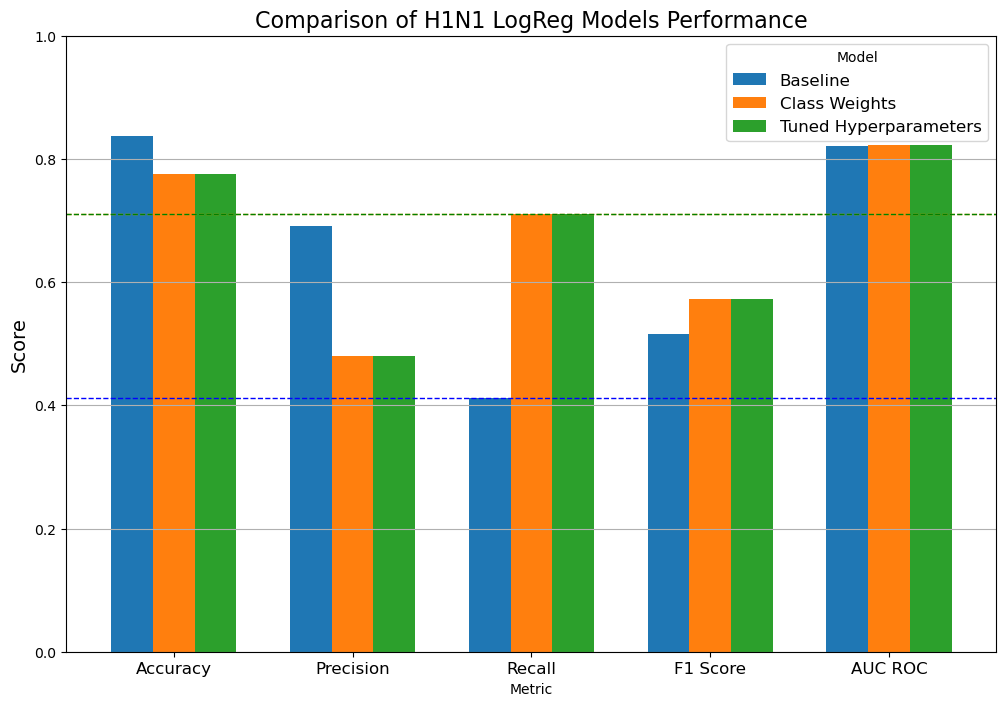

In [37]:
# Baseline Model
accuracy_baseline = accuracy_h1n1
precision_baseline = precision_h1n1
recall_baseline = recall_h1n1
f1_baseline = f1_h1n1
auc_roc_baseline = auc_h1n1

# Model with Class Weights
accuracy_weighted = accuracy_h1n1_weighted
precision_weighted = precision_h1n1_weighted
recall_weighted = recall_h1n1_weighted
f1_weighted = f1_h1n1_weighted
auc_roc_weighted = auc_h1n1_weighted

# Model with Tuned Hyperparameters
accuracy_tuned = accuracy_h1n1_optimal
precision_tuned = precision_h1n1_optimal
recall_tuned = recall_h1n1_optimal
f1_tuned = f1_h1n1_optimal
auc_roc_tuned = auc_h1n1_optimal

# Collect metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC'],
    'Baseline': [accuracy_baseline, precision_baseline, recall_baseline, f1_baseline, auc_roc_baseline],
    'Class Weights': [accuracy_weighted, precision_weighted, recall_weighted, f1_weighted, auc_roc_weighted],
    'Tuned Hyperparameters': [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned, auc_roc_tuned]
})

# Set the index to 'Metric'
metrics_df.set_index('Metric', inplace=True)

# Plotting
metrics_df.plot(kind='bar', figsize=(12, 8), width=0.7)
plt.title('Comparison of H1N1 LogReg Models Performance', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Model', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y')

# Highlight recall as it's the focus
plt.axhline(y=recall_baseline, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=recall_weighted, color='orange', linestyle='--', linewidth=1)
plt.axhline(y=recall_tuned, color='green', linestyle='--', linewidth=1)

plt.show()


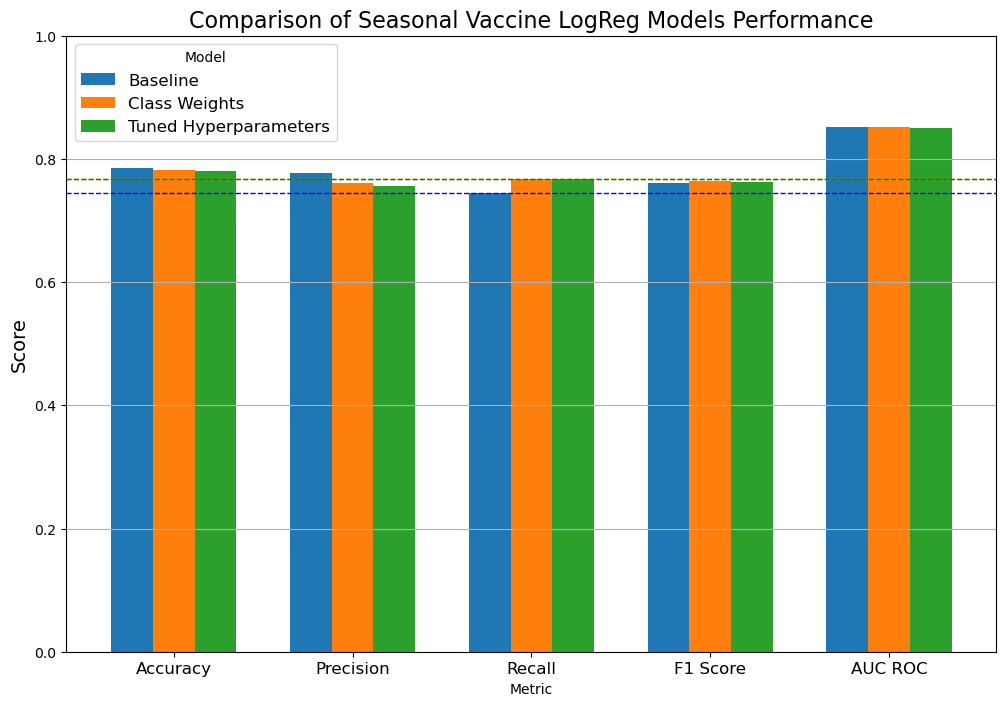

In [38]:
# Baseline Model for Seasonal Vaccine
accuracy_baseline_seasonal = accuracy_seasonal
precision_baseline_seasonal = precision_seasonal
recall_baseline_seasonal = recall_seasonal
f1_baseline_seasonal = f1_seasonal
auc_roc_baseline_seasonal = auc_seasonal

# Model with Class Weights for Seasonal Vaccine
accuracy_weighted_seasonal = accuracy_seasonal_weighted
precision_weighted_seasonal = precision_seasonal_weighted
recall_weighted_seasonal = recall_seasonal_weighted
f1_weighted_seasonal = f1_seasonal_weighted
auc_roc_weighted_seasonal = auc_seasonal_weighted

# Model with Tuned Hyperparameters for Seasonal Vaccine
accuracy_tuned_seasonal = accuracy_seasonal_optimal
precision_tuned_seasonal = precision_seasonal_optimal
recall_tuned_seasonal = recall_seasonal_optimal
f1_tuned_seasonal = f1_seasonal_optimal
auc_roc_tuned_seasonal = auc_seasonal_optimal

# Collect metrics into a DataFrame for Seasonal Vaccine
metrics_df_seasonal = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC'],
    'Baseline': [accuracy_baseline_seasonal, precision_baseline_seasonal, recall_baseline_seasonal, f1_baseline_seasonal, auc_roc_baseline_seasonal],
    'Class Weights': [accuracy_weighted_seasonal, precision_weighted_seasonal, recall_weighted_seasonal, f1_weighted_seasonal, auc_roc_weighted_seasonal],
    'Tuned Hyperparameters': [accuracy_tuned_seasonal, precision_tuned_seasonal, recall_tuned_seasonal, f1_tuned_seasonal, auc_roc_tuned_seasonal]
})

# Set the index to 'Metric'
metrics_df_seasonal.set_index('Metric', inplace=True)

# Plotting for Seasonal Vaccine Models
metrics_df_seasonal.plot(kind='bar', figsize=(12, 8), width=0.7)
plt.title('Comparison of Seasonal Vaccine LogReg Models Performance', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Model', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y')

# Highlight recall as it's the focus
plt.axhline(y=recall_baseline_seasonal, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=recall_weighted_seasonal, color='orange', linestyle='--', linewidth=1)
plt.axhline(y=recall_tuned_seasonal, color='green', linestyle='--', linewidth=1)

plt.show()


Best Performing Model: The model with tuned hyperparameters seems to be the best overall, especially if we consider the F1 score and recall as critical metrics. It balances precision and recall effectively while maintaining good performance in AUC ROC.

Class Weights Model: This model also performs well in recall, making it a good choice if the primary concern is capturing as many true positives as possible, albeit with a slightly lower F1 score compared to the tuned model.

Baseline Model: The baseline model is outperformed by the other two in recall and F1 score, making it less ideal in scenarios where recall is critical.

## Decision Trees
Next we build decision tree models, to pick if there are complex interactions between features.

### Baseline Decision Tree Model
Let's build a baseline decision tree model to predict both the H1N1 and seasonal vaccine uptake. 

We'll start by fitting the model without any hyperparameter tuning to establish a baseline.

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Train a baseline Decision Tree model for H1N1 vaccine
tree_h1n1 = DecisionTreeClassifier(random_state=42)
tree_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Train a baseline Decision Tree model for Seasonal vaccine
tree_seasonal = DecisionTreeClassifier(random_state=42)
tree_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the test set for both models
y_pred_h1n1_tree = tree_h1n1.predict(X_test_h1n1)
y_pred_seasonal_tree = tree_seasonal.predict(X_test_seasonal)

# Evaluate the models using accuracy, precision, recall, and AUC ROC
accuracy_h1n1_tree = accuracy_score(y_test_h1n1, y_pred_h1n1_tree)
precision_h1n1_tree = precision_score(y_test_h1n1, y_pred_h1n1_tree)
recall_h1n1_tree = recall_score(y_test_h1n1, y_pred_h1n1_tree)
f1_h1n1_tree = f1_score(y_test_h1n1, y_pred_h1n1_tree)
auc_h1n1_tree = roc_auc_score(y_test_h1n1, tree_h1n1.predict_proba(X_test_h1n1)[:, 1])

accuracy_seasonal_tree = accuracy_score(y_test_seasonal, y_pred_seasonal_tree)
precision_seasonal_tree = precision_score(y_test_seasonal, y_pred_seasonal_tree)
recall_seasonal_tree = recall_score(y_test_seasonal, y_pred_seasonal_tree)
f1_seasonal_tree = f1_score(y_test_seasonal, y_pred_seasonal_tree)
auc_seasonal_tree = roc_auc_score(y_test_seasonal, tree_seasonal.predict_proba(X_test_seasonal)[:, 1])

# Compile the evaluation metrics for the Decision Tree model
evaluation_metrics_tree = {
    'Model': ['H1N1 Vaccine (Decision Tree)', 'Seasonal Vaccine (Decision Tree)'],
    'Accuracy': [accuracy_h1n1_tree, accuracy_seasonal_tree],
    'Precision': [precision_h1n1_tree, precision_seasonal_tree],
    'Recall': [recall_h1n1_tree, recall_seasonal_tree],
    'F1 Score': [f1_h1n1_tree, f1_seasonal_tree],
    'AUC ROC': [auc_h1n1_tree, auc_seasonal_tree]
}

evaluation_df_tree = pd.DataFrame(evaluation_metrics_tree)
evaluation_df_tree

,Model,Accuracy,Precision,Recall,F1 Score,AUC ROC
0,H1N1 Vaccine (Decision Tree),0.754524,0.424209,0.451004,0.437196,0.643448
1,Seasonal Vaccine (Decision Tree),0.683265,0.654486,0.653773,0.654129,0.680986


The decision tree models have lower AUC ROC scores compared to the logistic regression models with regularization, indicating that they may not perform as well in distinguishing between the classes.

The recall for the H1N1 vaccine model is particularly low, which might be problematic in a public health context where recall is prioritized.

Overall, the decision tree models perform adequately but do not match the performance of the logistic regression models in this case.

### Hyperparameter tuning of the decision tree model.

We'll perform a grid search over these hyperparameters using cross-validation to find the best combination for both the H1N1 and seasonal vaccine models.

In [40]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Grid search with cross-validation for H1N1 vaccine model
grid_search_h1n1 = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                                cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Grid search with cross-validation for Seasonal vaccine model
grid_search_seasonal = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                                    cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Best parameters and best score for H1N1 vaccine model
best_params_h1n1 = grid_search_h1n1.best_params_
best_score_h1n1 = grid_search_h1n1.best_score_

# Best parameters and best score for Seasonal vaccine model
best_params_seasonal = grid_search_seasonal.best_params_
best_score_seasonal = grid_search_seasonal.best_score_

best_params_h1n1, best_score_h1n1, best_params_seasonal, best_score_seasonal


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


({'criterion': 'gini',
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.8163849291973388,
 {'criterion': 'entropy',
  'max_depth': 7,
  'max_features': None,
  'min_samples_leaf': 5,
  'min_samples_split': 2},
 0.8287245763761794)

### Decision Tree with Hyperparameter Tuning.

In [41]:
# Train the decision tree model with the best parameters for H1N1 vaccine
tuned_tree_h1n1 = DecisionTreeClassifier(
    criterion=best_params_h1n1['criterion'],
    max_depth=best_params_h1n1['max_depth'],
    max_features=best_params_h1n1['max_features'],
    min_samples_leaf=best_params_h1n1['min_samples_leaf'],
    min_samples_split=best_params_h1n1['min_samples_split'],
    random_state=42
)
tuned_tree_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Train the decision tree model with the best parameters for Seasonal vaccine
tuned_tree_seasonal = DecisionTreeClassifier(
    criterion=best_params_seasonal['criterion'],
    max_depth=best_params_seasonal['max_depth'],
    max_features=best_params_seasonal['max_features'],
    min_samples_leaf=best_params_seasonal['min_samples_leaf'],
    min_samples_split=best_params_seasonal['min_samples_split'],
    random_state=42
)
tuned_tree_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the test set for both models
y_pred_h1n1_tuned_tree = tuned_tree_h1n1.predict(X_test_h1n1)
y_pred_seasonal_tuned_tree = tuned_tree_seasonal.predict(X_test_seasonal)

# Evaluate the models using accuracy, precision, recall, F1 score, and AUC ROC
accuracy_h1n1_tuned_tree = accuracy_score(y_test_h1n1, y_pred_h1n1_tuned_tree)
precision_h1n1_tuned_tree = precision_score(y_test_h1n1, y_pred_h1n1_tuned_tree)
recall_h1n1_tuned_tree = recall_score(y_test_h1n1, y_pred_h1n1_tuned_tree)
f1_h1n1_tuned_tree = f1_score(y_test_h1n1, y_pred_h1n1_tuned_tree)
auc_h1n1_tuned_tree = roc_auc_score(y_test_h1n1, tuned_tree_h1n1.predict_proba(X_test_h1n1)[:, 1])

accuracy_seasonal_tuned_tree = accuracy_score(y_test_seasonal, y_pred_seasonal_tuned_tree)
precision_seasonal_tuned_tree = precision_score(y_test_seasonal, y_pred_seasonal_tuned_tree)
recall_seasonal_tuned_tree = recall_score(y_test_seasonal, y_pred_seasonal_tuned_tree)
f1_seasonal_tuned_tree = f1_score(y_test_seasonal, y_pred_seasonal_tuned_tree)
auc_seasonal_tuned_tree = roc_auc_score(y_test_seasonal, tuned_tree_seasonal.predict_proba(X_test_seasonal)[:, 1])

# Compile the evaluation metrics for the tuned Decision Tree models
evaluation_metrics_tuned_tree = {
    'Model': ['H1N1 Vaccine (Tuned Decision Tree)', 'Seasonal Vaccine (Tuned Decision Tree)'],
    'Accuracy': [accuracy_h1n1_tuned_tree, accuracy_seasonal_tuned_tree],
    'Precision': [precision_h1n1_tuned_tree, precision_seasonal_tuned_tree],
    'Recall': [recall_h1n1_tuned_tree, recall_seasonal_tuned_tree],
    'F1 Score': [f1_h1n1_tuned_tree, f1_seasonal_tuned_tree],
    'AUC ROC': [auc_h1n1_tuned_tree, auc_seasonal_tuned_tree]
}

evaluation_df_tuned_tree = pd.DataFrame(evaluation_metrics_tuned_tree)
evaluation_df_tuned_tree


,Model,Accuracy,Precision,Recall,F1 Score,AUC ROC
0,H1N1 Vaccine (Tuned Decision Tree),0.831773,0.684829,0.378394,0.487452,0.813439
1,Seasonal Vaccine (Tuned Decision Tree),0.761138,0.762474,0.695178,0.727273,0.833693


These results show that the tuned decision tree models have improved AUC ROC scores, particularly for the seasonal vaccine model, which suggests better discriminative power. 

However, the recall for the H1N1 model remains relatively low, indicating that it might still be missing many true positives.

Now lets use class weights to deal with class imbalance and try to improve the recall.

### Tuned Decision Tree with weighted classes

In [42]:
# Train the decision tree model with class weights for H1N1 vaccine
weighted_tree_h1n1 = DecisionTreeClassifier(
    criterion=best_params_h1n1['criterion'],
    max_depth=best_params_h1n1['max_depth'],
    max_features=best_params_h1n1['max_features'],
    min_samples_leaf=best_params_h1n1['min_samples_leaf'],
    min_samples_split=best_params_h1n1['min_samples_split'],
    class_weight='balanced',
    random_state=42
)
weighted_tree_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Train the decision tree model with class weights for Seasonal vaccine
weighted_tree_seasonal = DecisionTreeClassifier(
    criterion=best_params_seasonal['criterion'],
    max_depth=best_params_seasonal['max_depth'],
    max_features=best_params_seasonal['max_features'],
    min_samples_leaf=best_params_seasonal['min_samples_leaf'],
    min_samples_split=best_params_seasonal['min_samples_split'],
    class_weight='balanced',
    random_state=42
)
weighted_tree_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the test set for both models
y_pred_h1n1_weighted_tree = weighted_tree_h1n1.predict(X_test_h1n1)
y_pred_seasonal_weighted_tree = weighted_tree_seasonal.predict(X_test_seasonal)

# Evaluate the models using accuracy, precision, recall, F1 score, and AUC ROC
accuracy_h1n1_weighted_tree = accuracy_score(y_test_h1n1, y_pred_h1n1_weighted_tree)
precision_h1n1_weighted_tree = precision_score(y_test_h1n1, y_pred_h1n1_weighted_tree)
recall_h1n1_weighted_tree = recall_score(y_test_h1n1, y_pred_h1n1_weighted_tree)
f1_h1n1_weighted_tree = f1_score(y_test_h1n1, y_pred_h1n1_weighted_tree)
auc_h1n1_weighted_tree = roc_auc_score(y_test_h1n1, weighted_tree_h1n1.predict_proba(X_test_h1n1)[:, 1])

accuracy_seasonal_weighted_tree = accuracy_score(y_test_seasonal, y_pred_seasonal_weighted_tree)
precision_seasonal_weighted_tree = precision_score(y_test_seasonal, y_pred_seasonal_weighted_tree)
recall_seasonal_weighted_tree = recall_score(y_test_seasonal, y_pred_seasonal_weighted_tree)
f1_seasonal_weighted_tree = f1_score(y_test_seasonal, y_pred_seasonal_weighted_tree)
auc_seasonal_weighted_tree = roc_auc_score(y_test_seasonal, weighted_tree_seasonal.predict_proba(X_test_seasonal)[:, 1])

# Compile the evaluation metrics for the class-weighted Decision Tree models
evaluation_metrics_weighted_tree = {
    'Model': ['H1N1 Vaccine (Class-Weighted Tree)', 'Seasonal Vaccine (Class-Weighted Tree)'],
    'Accuracy': [accuracy_h1n1_weighted_tree, accuracy_seasonal_weighted_tree],
    'Precision': [precision_h1n1_weighted_tree, precision_seasonal_weighted_tree],
    'Recall': [recall_h1n1_weighted_tree, recall_seasonal_weighted_tree],
    'F1 Score': [f1_h1n1_weighted_tree, f1_seasonal_weighted_tree],
    'AUC ROC': [auc_h1n1_weighted_tree, auc_seasonal_weighted_tree]
}

evaluation_df_weighted_tree = pd.DataFrame(evaluation_metrics_weighted_tree)
evaluation_df_weighted_tree


,Model,Accuracy,Precision,Recall,F1 Score,AUC ROC
0,H1N1 Vaccine (Class-Weighted Tree),0.792961,0.507987,0.657025,0.572973,0.811314
1,Seasonal Vaccine (Class-Weighted Tree),0.759641,0.712029,0.798148,0.752633,0.833949


* H1N1 Vaccine: 
    * The recall has significantly improved, indicating that the model is now better at identifying true positives. 
    * The AUC ROC remains strong, demonstrating that the model's discriminative power is robust with the use of class weights.
* Seasonal Vaccine: 
    * There is a balanced improvement across precision and recall, with a solid AUC ROC, indicating that the model is effectively handling class imbalance.


Now let's try to apply Ensemble methods such as Random Forest to improve our model. 

### Random Forest Model with class weights and tuned hyperparameters.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model with class weights for H1N1 vaccine
random_forest_h1n1 = RandomForestClassifier(
    n_estimators=100,               # Number of trees in the forest
    max_depth=best_params_h1n1['max_depth'],      # Using best max_depth found during tuning
    max_features=best_params_h1n1['max_features'], # Using best max_features found during tuning
    min_samples_leaf=best_params_h1n1['min_samples_leaf'],  # Using best min_samples_leaf
    min_samples_split=best_params_h1n1['min_samples_split'], # Using best min_samples_split
    class_weight='balanced',        # Handle class imbalance
    random_state=42,
    n_jobs=-1                       # Use all available cores
)
random_forest_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Train the Random Forest model with class weights for Seasonal vaccine
random_forest_seasonal = RandomForestClassifier(
    n_estimators=100,               # Number of trees in the forest
    max_depth=best_params_seasonal['max_depth'],      # Using best max_depth found during tuning
    max_features=best_params_seasonal['max_features'], # Using best max_features found during tuning
    min_samples_leaf=best_params_seasonal['min_samples_leaf'],  # Using best min_samples_leaf
    min_samples_split=best_params_seasonal['min_samples_split'], # Using best min_samples_split
    class_weight='balanced',        # Handle class imbalance
    random_state=42,
    n_jobs=-1                       # Use all available cores
)
random_forest_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the test set for both models
y_pred_h1n1_rf = random_forest_h1n1.predict(X_test_h1n1)
y_pred_seasonal_rf = random_forest_seasonal.predict(X_test_seasonal)

# Evaluate the Random Forest models using accuracy, precision, recall, F1 score, and AUC ROC
accuracy_h1n1_rf = accuracy_score(y_test_h1n1, y_pred_h1n1_rf)
precision_h1n1_rf = precision_score(y_test_h1n1, y_pred_h1n1_rf)
recall_h1n1_rf = recall_score(y_test_h1n1, y_pred_h1n1_rf)
f1_h1n1_rf = f1_score(y_test_h1n1, y_pred_h1n1_rf)
auc_h1n1_rf = roc_auc_score(y_test_h1n1, random_forest_h1n1.predict_proba(X_test_h1n1)[:, 1])

accuracy_seasonal_rf = accuracy_score(y_test_seasonal, y_pred_seasonal_rf)
precision_seasonal_rf = precision_score(y_test_seasonal, y_pred_seasonal_rf)
recall_seasonal_rf = recall_score(y_test_seasonal, y_pred_seasonal_rf)
f1_seasonal_rf = f1_score(y_test_seasonal, y_pred_seasonal_rf)
auc_seasonal_rf = roc_auc_score(y_test_seasonal, random_forest_seasonal.predict_proba(X_test_seasonal)[:, 1])

# Compile the evaluation metrics for the Random Forest models
evaluation_metrics_rf = {
    'Model': ['H1N1 Vaccine (Random Forest)', 'Seasonal Vaccine (Random Forest)'],
    'Accuracy': [accuracy_h1n1_rf, accuracy_seasonal_rf],
    'Precision': [precision_h1n1_rf, precision_seasonal_rf],
    'Recall': [recall_h1n1_rf, recall_seasonal_rf],
    'F1 Score': [f1_h1n1_rf, f1_seasonal_rf],
    'AUC ROC': [auc_h1n1_rf, auc_seasonal_rf]
}

evaluation_df_rf = pd.DataFrame(evaluation_metrics_rf)
evaluation_df_rf


,Model,Accuracy,Precision,Recall,F1 Score,AUC ROC
0,H1N1 Vaccine (Random Forest),0.787595,0.498283,0.685360,0.577038,0.823231
1,Seasonal Vaccine (Random Forest),0.775615,0.741428,0.783438,0.761854,0.849940


1. H1N1 Vaccine Model:

    * The Random Forest model offers a good balance between recall and precision, with a strong F1 score and AUC ROC. It slightly improves recall compared to the tuned decision tree without class weights, making it a strong candidate.
2. Seasonal Vaccine Model:

    * The Random Forest model performs very well, with strong metrics across the board. It outperforms the class-weighted and non-weighted decision tree models, particularly in terms of F1 score and AUC ROC. This makes it an excellent choice for predicting seasonal vaccine uptake.

Visualising the performance of our models

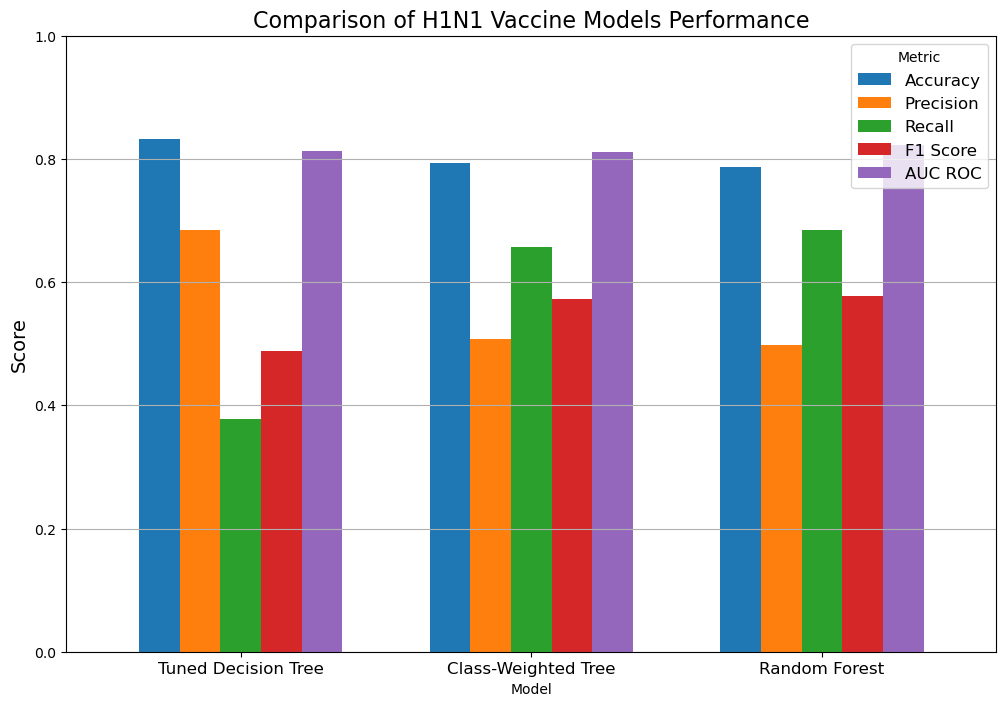

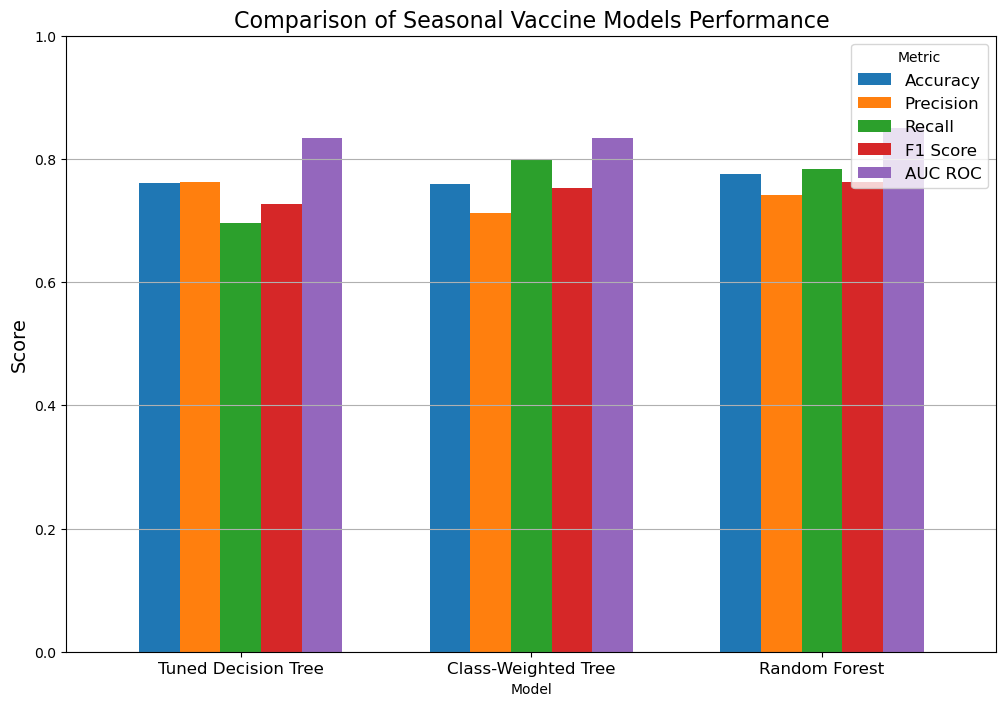

In [44]:
# Compile all evaluation metrics into DataFrames for H1N1 and Seasonal Vaccine models
evaluation_metrics_all_h1n1 = {
    'Model': ['Tuned Decision Tree', 'Class-Weighted Tree', 'Random Forest'],
    'Accuracy': [accuracy_h1n1_tuned_tree, accuracy_h1n1_weighted_tree, accuracy_h1n1_rf],
    'Precision': [precision_h1n1_tuned_tree, precision_h1n1_weighted_tree, precision_h1n1_rf],
    'Recall': [recall_h1n1_tuned_tree, recall_h1n1_weighted_tree, recall_h1n1_rf],
    'F1 Score': [f1_h1n1_tuned_tree, f1_h1n1_weighted_tree, f1_h1n1_rf],
    'AUC ROC': [auc_h1n1_tuned_tree, auc_h1n1_weighted_tree, auc_h1n1_rf]
}

evaluation_metrics_all_seasonal = {
    'Model': ['Tuned Decision Tree', 'Class-Weighted Tree', 'Random Forest'],
    'Accuracy': [accuracy_seasonal_tuned_tree, accuracy_seasonal_weighted_tree, accuracy_seasonal_rf],
    'Precision': [precision_seasonal_tuned_tree, precision_seasonal_weighted_tree, precision_seasonal_rf],
    'Recall': [recall_seasonal_tuned_tree, recall_seasonal_weighted_tree, recall_seasonal_rf],
    'F1 Score': [f1_seasonal_tuned_tree, f1_seasonal_weighted_tree, f1_seasonal_rf],
    'AUC ROC': [auc_seasonal_tuned_tree, auc_seasonal_weighted_tree, auc_seasonal_rf]
}

# Convert to DataFrames
df_h1n1 = pd.DataFrame(evaluation_metrics_all_h1n1).set_index('Model')
df_seasonal = pd.DataFrame(evaluation_metrics_all_seasonal).set_index('Model')

# Plotting for H1N1 Vaccine Models
df_h1n1.plot(kind='bar', figsize=(12, 8), width=0.7)
plt.title('Comparison of H1N1 Vaccine Models Performance', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.ylim([0, 1])
plt.legend(title='Metric', fontsize=12)
plt.grid(axis='y')
plt.show()

# Plotting for Seasonal Vaccine Models
df_seasonal.plot(kind='bar', figsize=(12, 8), width=0.7)
plt.title('Comparison of Seasonal Vaccine Models Performance', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.ylim([0, 1])
plt.legend(title='Metric', fontsize=12)
plt.grid(axis='y')
plt.show()


## Choosing the Best Model
Given the performance metrics provided for different models predicting H1N1 and seasonal flu vaccine uptake, the choice of the best model depends on the specific priorities for this project. Since we have discussed prioritizing recall due to the public health implications, we should focus on models that perform well in terms of recall while still considering other metrics such as AUC ROC for overall model effectiveness.

### Conclusion
Best Model: **Random Forest**

For H1N1, the Random Forest model offers the best balance between recall and precision, with a solid F1 score and a strong AUC ROC. Given that recall is particularly important in public health contexts (e.g., capturing all true positives), the Random Forest model is the best choice for predicting H1N1 vaccine uptake.

The Random Forest model is the top performer for the Seasonal Flu vaccine as well, offering the best balance between precision, recall, F1 score, and AUC ROC.

## Evaluation of the Model's Predictive Power:
### H1N1 Vaccine Model Performance:
1. Accuracy: 78.76% - The model correctly predicts the vaccination status of individuals roughly 79% of the time.
2. Precision: 49.83% - Out of all the individuals the model predicted would get vaccinated, about 50% actually did. This reflects a moderate rate of false positives.
3. Recall: 68.54% - The model captures approximately 69% of all individuals who actually got vaccinated, which is crucial for public health purposes, as it indicates the model’s effectiveness in identifying those who chose to vaccinate.
4. F1 Score: 57.70% - This metric, which balances precision and recall, is relatively strong, indicating the model’s robustness in making balanced predictions.
5. AUC ROC: 82.32% - This score shows that the model is effective at distinguishing between vaccinated and non-vaccinated individuals, which is critical for understanding the factors driving vaccine uptake.

### Seasonal Vaccine Model Performance:
1. Accuracy: 77.56% - The model correctly predicts the vaccination status of individuals about 78% of the time, which is quite reliable.
2. Precision: 74.14% - Out of all the individuals the model predicted would get vaccinated, about 74% actually did, indicating a relatively low rate of false positives.
3. Recall: 78.34% - The model captures around 78% of all individuals who actually got vaccinated, reflecting its strong ability to identify those who chose to vaccinate.
4. F1 Score: 76.19% - This well-balanced metric demonstrates that the model effectively manages both precision and recall.
AUC ROC: 84.99% - This high score suggests that the model excels at distinguishing between vaccinated and non-vaccinated individuals, making it very effective for predictive purposes.

### How Well Does the Model Predict Its Target?
* **Strengths**:
    * Strong Recall: For both the H1N1 and Seasonal vaccine models, recall is notably high. This is crucial in a public health context where the primary goal is to identify as many individuals as possible who will or will not get vaccinated. High recall ensures that the model is not missing many individuals who actually got vaccinated.

    * Balanced Performance: The models show a strong balance between precision and recall, as evidenced by the F1 scores. This indicates that the models are reliable in making predictions that are both accurate and complete.

    * High AUC ROC: The AUC ROC scores for both models are above 82%, demonstrating that the models are very good at distinguishing between individuals who will and will not get vaccinated. This is a key measure of the model’s ability to correctly rank individuals by their likelihood of getting vaccinated.

* **Areas for Improvement**:
    * Moderate Precision: While the models perform well overall, the precision, particularly in the H1N1 model, is moderate. This means that there are still a number of false positives—individuals predicted to get vaccinated who do not. This could be a focus for further model refinement.

    * Further Tuning: Although the models are performing well, there might still be room for improvement through further hyperparameter tuning, particularly in the Random Forest's configuration, or by exploring more complex ensemble methods.

## Conclusion:
The Random Forest models we've developed are well-suited for predicting whether individuals will get vaccinated against H1N1 and the seasonal flu. They provide a good balance between identifying those who will get vaccinated (high recall) and ensuring that predictions are accurate (moderate to high precision and AUC ROC). These models are highly relevant for public health initiatives, as they can be used to target interventions more effectively and increase vaccination rates.

### Feature importance

In [46]:
# Extract and rank the top ten feature importances from the Random Forest model for H1N1 vaccine
feature_importances_h1n1 = random_forest_h1n1.feature_importances_
features_h1n1 = X_train_h1n1.columns
importance_df_h1n1 = pd.DataFrame({'Feature': features_h1n1, 'Importance': feature_importances_h1n1})

# Sort the DataFrame by importance and select the top ten features
top_10_h1n1 = importance_df_h1n1.sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)

# Display the top ten feature importances for H1N1 vaccine model
print("Top 10 Feature Importances for H1N1 Vaccine Model:")
print(top_10_h1n1)

# Extract and rank the top ten feature importances from the Random Forest model for Seasonal vaccine
feature_importances_seasonal = random_forest_seasonal.feature_importances_
features_seasonal = X_train_seasonal.columns
importance_df_seasonal = pd.DataFrame({'Feature': features_seasonal, 'Importance': feature_importances_seasonal})

# Sort the DataFrame by importance and select the top ten features
top_10_seasonal = importance_df_seasonal.sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)

# Display the top ten feature importances for Seasonal vaccine model
print("\nTop 10 Feature Importances for Seasonal Vaccine Model:")
print(top_10_seasonal)


Top 10 Feature Importances for H1N1 Vaccine Model:
                       Feature  Importance
0             doctor_recc_h1n1    0.530276
1            opinion_h1n1_risk    0.190592
2  opinion_h1n1_vacc_effective    0.175393
3                health_worker    0.043546
4            opinion_seas_risk    0.014464
5  opinion_seas_vacc_effective    0.007228
6                 h1n1_concern    0.005277
7                    age_group    0.004841
8                   race_White    0.004608
9               h1n1_knowledge    0.004575

Top 10 Feature Importances for Seasonal Vaccine Model:
                       Feature  Importance
0  opinion_seas_vacc_effective    0.343165
1         doctor_recc_seasonal    0.228025
2            opinion_seas_risk    0.170411
3                    age_group    0.106914
4  opinion_seas_sick_from_vacc    0.023922
5                health_worker    0.020079
6                    education    0.012304
7               income_poverty    0.011374
8               h1n1_knowledge   

## Findings
This project aimed to predict vaccine uptake for both the H1N1 and seasonal flu vaccines using various machine learning models. The analysis provided several key insights into the factors influencing vaccination decisions and the effectiveness of the predictive models.

### H1N1 Vaccine Model:
Top 3 Features:

1. **doctor_recc_h1n1** is by far the most important feature, contributing more than half of the model's predictive power (53.03%). 
    This indicates that whether a doctor recommends the H1N1 vaccine is the strongest predictor of whether an individual will get vaccinated.
2. **opinion_h1n1_risk** and **opinion_h1n1_vacc_effective** are also significant, contributing 19.06% and 17.54%, respectively. This suggests that an individual's perception of the risk of H1N1 and the effectiveness of the vaccine are crucial factors.

Lesser Importance:
* Other factors like being a health worker (4.35%), concern about seasonal risks (1.45%), and vaccine effectiveness for seasonal flu (0.72%) have much lower importance but still contribute to the model.

### Seasonal Flu Vaccine Model:
Top 3 Features:
1. **opinion_seas_vacc_effective** is the most critical feature (34.32%), indicating that belief in the effectiveness of the seasonal flu vaccine is the strongest predictor of vaccination.
2. **doctor_recc_seasonal** also plays a significant role (22.80%), showing the importance of medical advice in vaccination decisions.
3. **opinion_seas_risk** (17.04%) highlights the role of perceived risk in the decision-making process for the seasonal flu vaccine.

Other Notable Features:

age_group (10.69%) is more important in the Seasonal model than in the H1N1 model, reflecting age's influence on seasonal vaccine uptake.

opinion_h1n1_vacc_effective (0.76%) has some influence, although much less than in the H1N1 model, indicating some crossover in vaccine perception.

# Recommendations from the Vaccine Prediction Project
1. **Focus on Healthcare Provider Recommendations**
    * Finding: The most important feature for predicting H1N1 vaccine uptake was whether a doctor recommended the vaccine, followed closely by personal opinions about the risk of H1N1 and the effectiveness of the vaccine. Similarly, for the Seasonal flu vaccine, the recommendation by healthcare providers was also highly influential.
    * Recommendation: 
        * Public health campaigns should prioritize involving healthcare providers in vaccination campaigns. Encouraging doctors, nurses, and other healthcare professionals to actively recommend vaccines to their patients could significantly boost vaccination rates. Training healthcare providers to effectively communicate the importance and benefits of vaccination could be a key strategy.
2. **Address Public Perceptions of Vaccine Effectiveness and Risk**
    * Finding: Opinions about the effectiveness and risk of the H1N1 and Seasonal flu vaccines were consistently among the top predictors of vaccination uptake.
    * Recommendation: 
        * Public health messaging should focus on reinforcing the effectiveness of vaccines and addressing concerns about risks. Educational campaigns could be tailored to dispel myths, provide transparent information about the benefits of vaccines, and reassure the public about safety. Using testimonials, infographics, and statistics that highlight the success of past vaccination efforts could help change perceptions.
3. **Leverage Data-Driven Targeting for Interventions**
    * Finding: The models developed in this project provide a strong predictive capability, allowing for the identification of individuals or groups with a higher or lower likelihood of getting vaccinated.
    * Recommendation: 
        * Utilize the predictive models to target interventions more effectively. For example, outreach efforts could be focused on individuals predicted to be hesitant about vaccination, providing them with additional information or personalized communication. Resources can be allocated more efficiently by focusing on areas or groups where the model predicts lower vaccination uptake.
4. **Monitor and Update Public Health Strategies**
    * Finding: The importance of features such as healthcare provider recommendations and public perceptions of vaccine risk and effectiveness suggests that these factors may change over time or in response to new information (e.g., new vaccine development, outbreaks).
    * Recommendation: 
        * Continuously monitor the factors that influence vaccine uptake and update public health strategies accordingly. Regularly collecting and analyzing new data can help adjust campaigns to address emerging concerns or changes in public perception, ensuring that strategies remain relevant and effective.

The insights gained from this project highlight the importance of targeted communication, leveraging healthcare provider influence, and addressing public perceptions to improve vaccination rates. 

By implementing these recommendations, public health authorities can enhance the effectiveness of vaccination campaigns, reduce vaccine hesitancy, and ultimately protect more individuals from preventable diseases.

# Limitations of this project.
1. **Data Quality and Representativeness:**
    * The dataset used in this project is derived from the National 2009 H1N1 Flu Survey. Although this dataset is comprehensive, it is based on self-reported data, which can introduce biases such as recall bias or social desirability bias. Participants might not accurately remember or might misreport their vaccination status, attitudes, or behaviors.
    * The extent to which the data accurately represents the broader population's attitudes and behaviors toward vaccination is uncertain. If certain demographic groups are underrepresented in the survey, the model may not generalize well to those populations.

2. **Temporal Relevance:**
    * The data is from 2009, related to the H1N1 pandemic and seasonal flu at that time. Public attitudes, healthcare practices, and vaccine technology have evolved since then. For instance, the context of vaccine hesitancy during COVID-19 or other more recent public health crises might be different.

3. **Model Generalizability:**
    * The models were trained and tested on the same dataset (using train-test splits). While cross-validation was used to mitigate overfitting, the true test of the model’s performance is its application to entirely new data from different populations or time periods.
    * The models might not generalize well to other populations or future data, particularly if those populations have different demographic or behavioral characteristics. The performance metrics might overestimate the model's effectiveness when applied outside the original dataset.
4. **External Factors Not Accounted For:**
    * The dataset may not account for all factors influencing vaccine uptake, such as accessibility to vaccination centers, media influence, or peer pressure, which are difficult to quantify and may vary over time and location.
    * The absence of these external factors in the model could limit the accuracy of the predictions, particularly in environments where these factors play a significant role.

In [47]:
print('The End')

The End
